<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Introduction to Neural Networks - Project Solution</font></center>

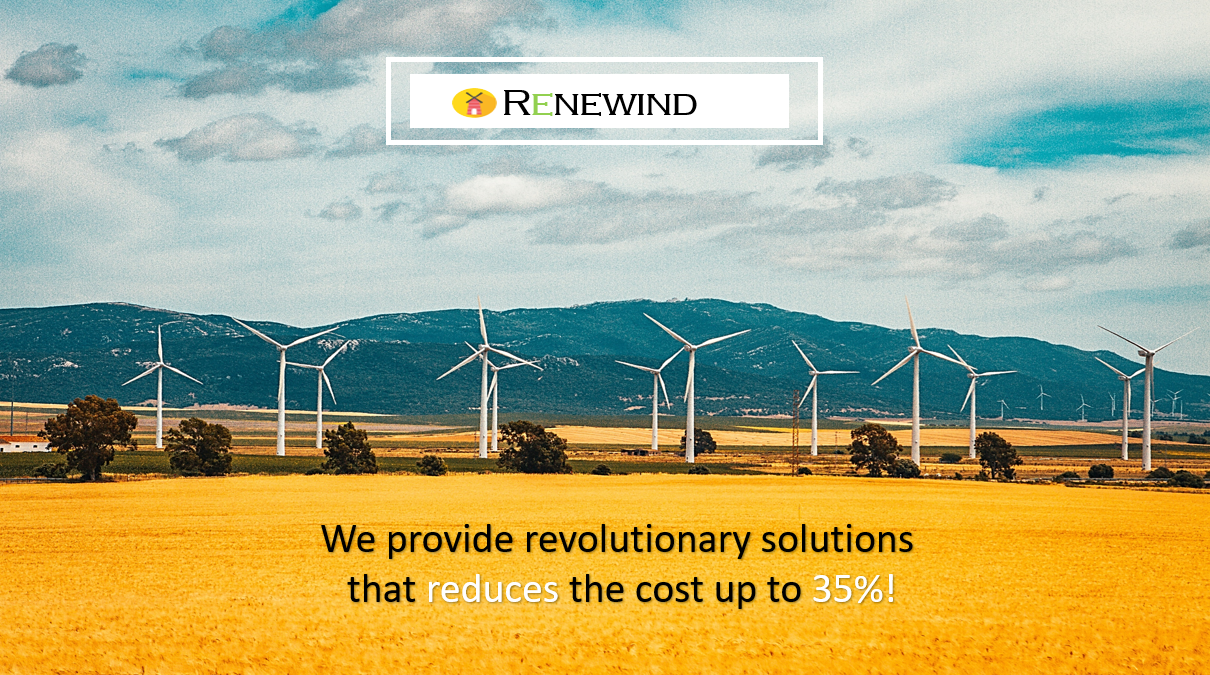

<center><font size=6>Wind Turbine Generator Failure Prediction</font></center>

# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Importing necessary libraries**

In [ ]:
!pip install tensorflow scikit-learn matplotlib seaborn numpy pandas

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
#Imports metrics from
from sklearn import metrics

#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the Data**

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

# **Data Overview**

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

## Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
df.shape

(20000, 41)

* The training dataset has 20000 rows and 41 columns

In [ ]:
# Checking the number of rows and columns in the test data
df_test.shape

(5000, 41)

* The test dataset has 5000 rows and 41 columns

In [ ]:
# let's create a copy of the training data
data = df.copy()

In [ ]:
# let's create a copy of the testing  data
data_test = df_test.copy()

## Displaying the first few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10  ...       V32       V33        V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198   
1 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599   
2 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138   
3 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714   
4  4.848994 -1.854920 -6.220023  ...  8.265896  6.629213 -10.068689  1.222987   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
2  5.360850  0.351993  2.940021  3.839160 -4.309402       0  
3  5.550100 -1.526796  0.138853  3.101430 -1.277378       0  
4 -3.229763  1.686909 -2.163896 -3.644622  6.510338       0  

[5 rows x 41 columns]

In [ ]:
#viewing first 5 rows of the test data
data_test.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.613489 -3.819640  2.202302  1.300420 -1.184929 -4.495964 -1.835817   
1  0.389608 -0.512341  0.527053 -2.576776 -1.016766  2.235112 -0.441301   
2 -0.874861 -0.640632  4.084202 -1.590454  0.525855 -1.957592 -0.695367   
3  0.238384  1.458607  4.014528  2.534478  1.196987 -3.117330 -0.924035   
4  5.828225  2.768260 -1.234530  2.809264 -1.641648 -1.406698  0.568643   

         V8        V9       V10  ...       V32       V33       V34       V35  \
0  4.722989  1.206140 -0.341909  ...  2.291204 -5.411388  0.870073  0.574479   
1 -4.405744 -0.332869  1.966794  ... -2.474936  2.493582  0.315165  2.059288   
2  1.347309 -1.732348  0.466500  ... -1.318888 -2.997464  0.459664  0.619774   
3  0.269493  1.322436  0.702345  ...  3.517918 -3.074085 -0.284220  0.954576   
4  0.965043  1.918379 -2.774855  ...  1.773841 -1.501573 -2.226702  4.776830   

        V36       V37        V38       V39       V40  Target  
0  4.157191  1.428093 -10.511342  0.454664 -1.448363       0  
1  0.683859 -0.485452   5.128350  1.720744 -1.488235       0  
2  5.631504  1.323512  -1.752154  1.808302  1.675748       0  
3  3.029331 -1.367198  -3.412140  0.906000 -2.450889       0  
4 -6.559698 -0.805551  -0.276007 -3.858207 -0.537694       0  

[5 rows x 41 columns]

## Checking the data types of the columns in the dataset

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

- Converting Target column to float

In [ ]:
data['Target'] = data['Target'].astype(float)


In [ ]:
#Checking change in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

Now checking for test data

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

Converting Target to float

In [ ]:
data_test['Target'] = data_test['Target'].astype(float)

In [ ]:
#Checking the datatype now
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

## Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

- No duplicate values present in the data.

## Checking for missing values

In [ ]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

V1        0.09
V2        0.09
V3        0.00
V4        0.00
V5        0.00
V6        0.00
V7        0.00
V8        0.00
V9        0.00
V10       0.00
V11       0.00
V12       0.00
V13       0.00
V14       0.00
V15       0.00
V16       0.00
V17       0.00
V18       0.00
V19       0.00
V20       0.00
V21       0.00
V22       0.00
V23       0.00
V24       0.00
V25       0.00
V26       0.00
V27       0.00
V28       0.00
V29       0.00
V30       0.00
V31       0.00
V32       0.00
V33       0.00
V34       0.00
V35       0.00
V36       0.00
V37       0.00
V38       0.00
V39       0.00
V40       0.00
Target    0.00
dtype: float64

- There are 0.090% missing values in V1 and 0.090% missing values in V2

In [ ]:
# let's check for missing values in the test data
round(data_test.isnull().sum() / data_test.isnull().count() * 100, 2)

V1        0.10
V2        0.12
V3        0.00
V4        0.00
V5        0.00
V6        0.00
V7        0.00
V8        0.00
V9        0.00
V10       0.00
V11       0.00
V12       0.00
V13       0.00
V14       0.00
V15       0.00
V16       0.00
V17       0.00
V18       0.00
V19       0.00
V20       0.00
V21       0.00
V22       0.00
V23       0.00
V24       0.00
V25       0.00
V26       0.00
V27       0.00
V28       0.00
V29       0.00
V30       0.00
V31       0.00
V32       0.00
V33       0.00
V34       0.00
V35       0.00
V36       0.00
V37       0.00
V38       0.00
V39       0.00
V40       0.00
Target    0.00
dtype: float64

- There are 0.1% missing values in V1 and 0.12% missing values in V2

## Statistical summary of the dataset

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

count      mean       std        min       25%       50%       75%  \
V1      19982.0 -0.271996  3.441625 -11.876451 -2.737146 -0.747917  1.840112   
V2      19982.0  0.440430  3.150784 -12.319951 -1.640674  0.471536  2.543967   
V3      20000.0  2.484699  3.388963 -10.708139  0.206860  2.255786  4.566165   
V4      20000.0 -0.083152  3.431595 -15.082052 -2.347660 -0.135241  2.130615   
V5      20000.0 -0.053752  2.104801  -8.603361 -1.535607 -0.101952  1.340480   
V6      20000.0 -0.995443  2.040970 -10.227147 -2.347238 -1.000515  0.380330   
V7      20000.0 -0.879325  1.761626  -7.949681 -2.030926 -0.917179  0.223695   
V8      20000.0 -0.548195  3.295756 -15.657561 -2.642665 -0.389085  1.722965   
V9      20000.0 -0.016808  2.160568  -8.596313 -1.494973 -0.067597  1.409203   
V10     20000.0 -0.012998  2.193201  -9.853957 -1.411212  0.100973  1.477045   
V11     20000.0 -1.895393  3.124322 -14.832058 -3.922404 -1.921237  0.118906   
V12     20000.0  1.604825  2.930454 -12.948007 -0.396514  1.507841  3.571454   
V13     20000.0  1.580486  2.874658 -13.228247 -0.223545  1.637185  3.459886   
V14     20000.0 -0.950632  1.789651  -7.738593 -2.170741 -0.957163  0.270677   
V15     20000.0 -2.414993  3.354974 -16.416606 -4.415322 -2.382617 -0.359052   
V16     20000.0 -2.925225  4.221717 -20.374158 -5.634240 -2.682705 -0.095046   
V17     20000.0 -0.134261  3.345462 -14.091184 -2.215611 -0.014580  2.068751   
V18     20000.0  1.189347  2.592276 -11.643994 -0.403917  0.883398  2.571770   
V19     20000.0  1.181808  3.396925 -13.491784 -1.050168  1.279061  3.493299   
V20     20000.0  0.023608  3.669477 -13.922659 -2.432953  0.033415  2.512372   
V21     20000.0 -3.611252  3.567690 -17.956231 -5.930360 -3.532888 -1.265884   
V22     20000.0  0.951835  1.651547 -10.122095 -0.118127  0.974687  2.025594   
V23     20000.0 -0.366116  4.031860 -14.866128 -3.098756 -0.262093  2.451750   
V24     20000.0  1.134389  3.912069 -16.387147 -1.468062  0.969048  3.545975   
V25     20000.0 -0.002186  2.016740  -8.228266 -1.365178  0.025050  1.397112   
V26     20000.0  1.873785  3.435137 -11.834271 -0.337863  1.950531  4.130037   
V27     20000.0 -0.612413  4.368847 -14.904939 -3.652323 -0.884894  2.189177   
V28     20000.0 -0.883218  1.917713  -9.269489 -2.171218 -0.891073  0.375884   
V29     20000.0 -0.985625  2.684365 -12.579469 -2.787443 -1.176181  0.629773   
V30     20000.0 -0.015534  3.005258 -14.796047 -1.867114  0.184346  2.036229   
V31     20000.0  0.486842  3.461384 -13.722760 -1.817772  0.490304  2.730688   
V32     20000.0  0.303799  5.500400 -19.876502 -3.420469  0.052073  3.761722   
V33     20000.0  0.049825  3.575285 -16.898353 -2.242857 -0.066249  2.255134   
V34     20000.0 -0.462702  3.183841 -17.985094 -2.136984 -0.255008  1.436935   
V35     20000.0  2.229620  2.937102 -15.349803  0.336191  2.098633  4.064358   
V36     20000.0  1.514809  3.800860 -14.833178 -0.943809  1.566526  3.983939   
V37     20000.0  0.011316  1.788165  -5.478350 -1.255819 -0.128435  1.175533   
V38     20000.0 -0.344025  3.948147 -17.375002 -2.987638 -0.316849  2.279399   
V39     20000.0  0.890653  1.753054  -6.438880 -0.272250  0.919261  2.057540   
V40     20000.0 -0.875630  3.012155 -11.023935 -2.940193 -0.920806  1.119897   
Target  20000.0  0.055500  0.228959   0.000000  0.000000  0.000000  0.000000   

              max  
V1      15.493002  
V2      13.089269  
V3      17.090919  
V4      13.236381  
V5       8.133797  
V6       6.975847  
V7       8.006091  
V8      11.679495  
V9       8.137580  
V10      8.108472  
V11     11.826433  
V12     15.080698  
V13     15.419616  
V14      5.670664  
V15     12.246455  
V16     13.583212  
V17     16.756432  
V18     13.179863  
V19     13.237742  
V20     16.052339  
V21     13.840473  
V22      7.409856  
V23     14.458734  
V24     17.163291  
V25      8.223389  
V26     16.836410  
V27     17.560404  
V28      6.527643  
V29     10.722055  
V30     12.505812  
V31     17.255090  
V32     2

#### Observations:
- Values of all the variables lies between -25 and 25
- Looking at the values of 75th percentile and maximum, we can see there are outliers in many variables like V1, V2 and many more.

# **Exploratory Data Analysis**

## Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Variables V1 to V40

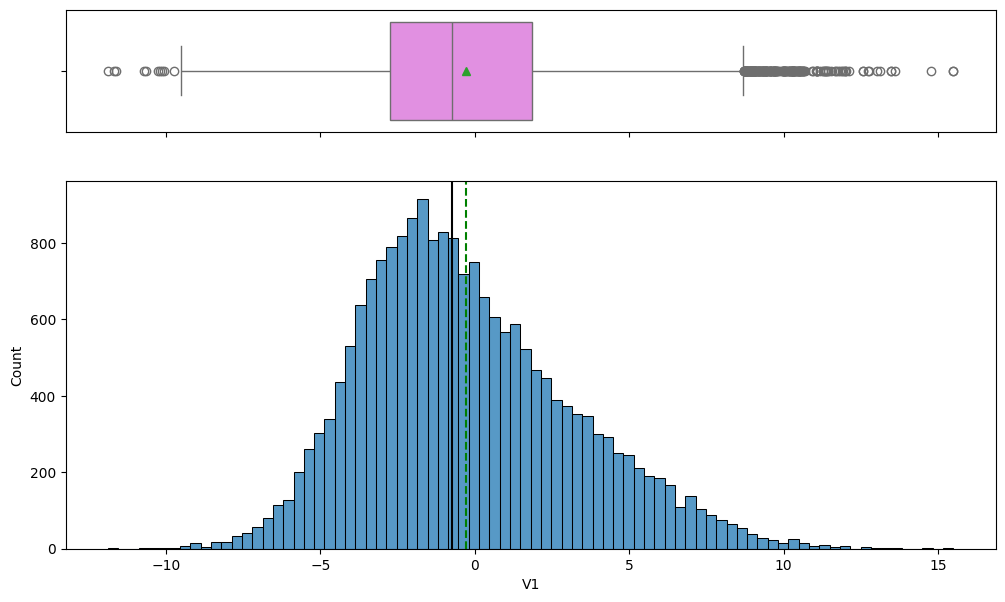

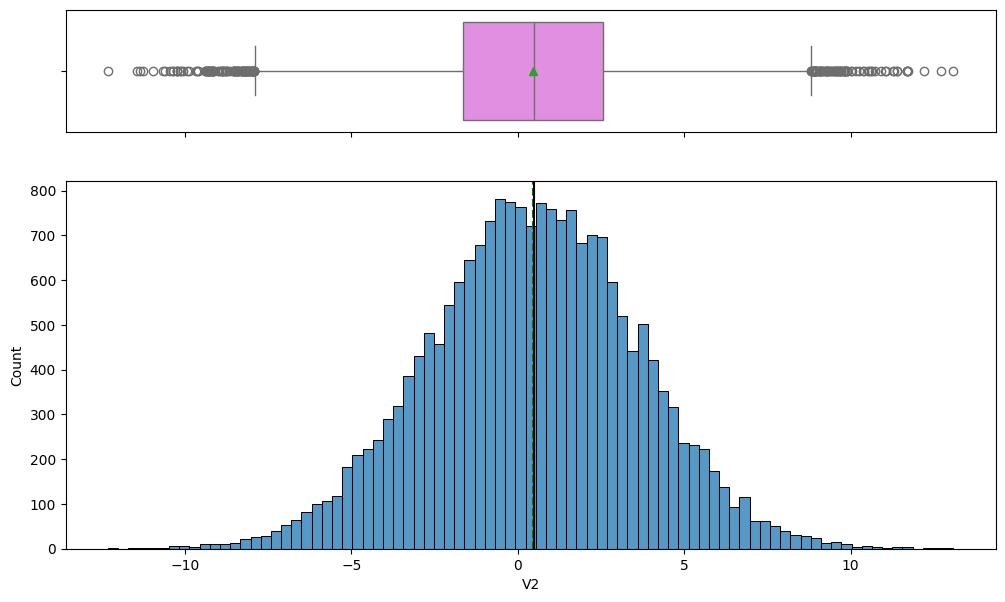

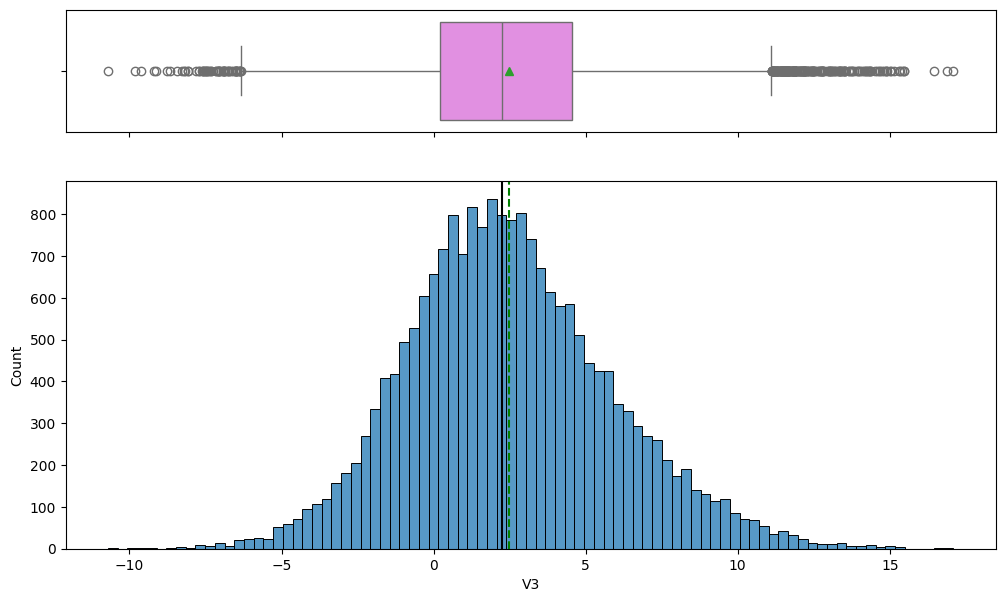

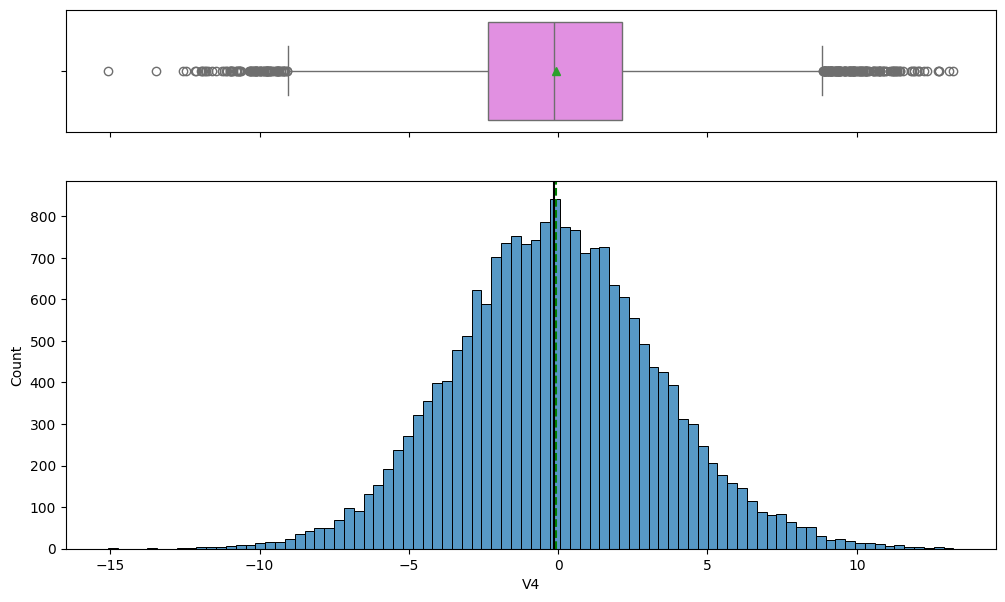

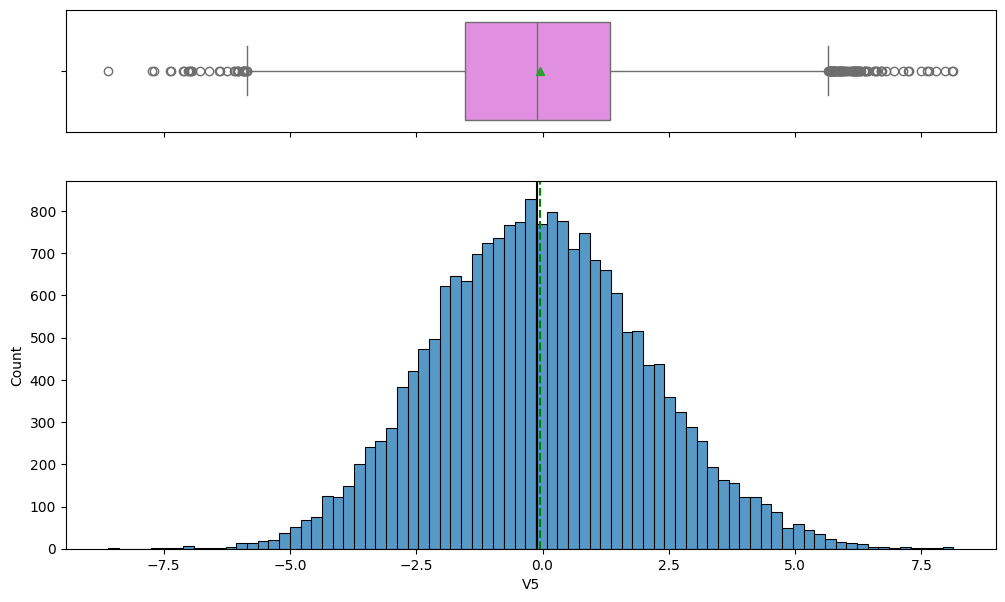

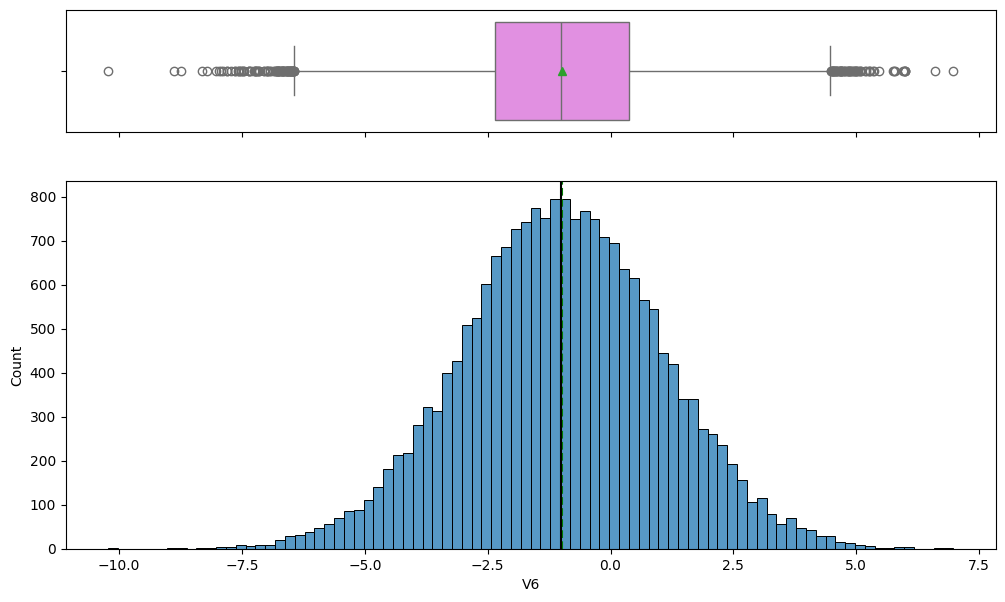

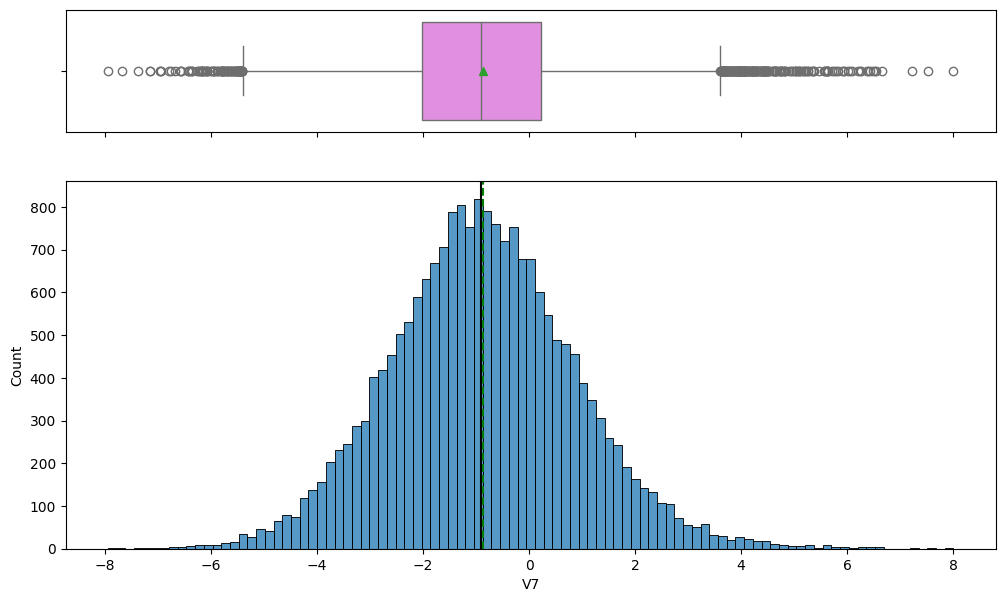

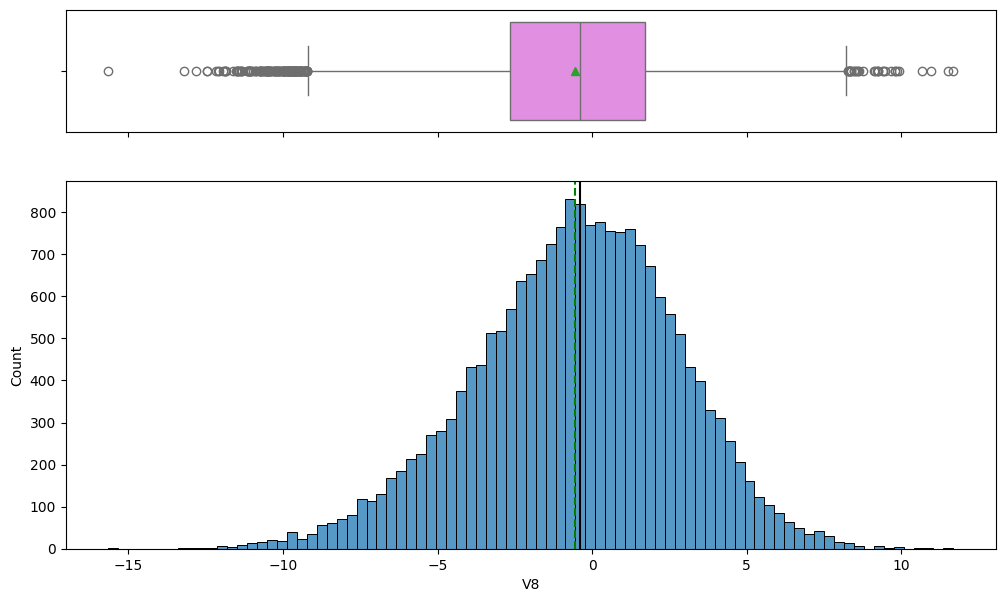

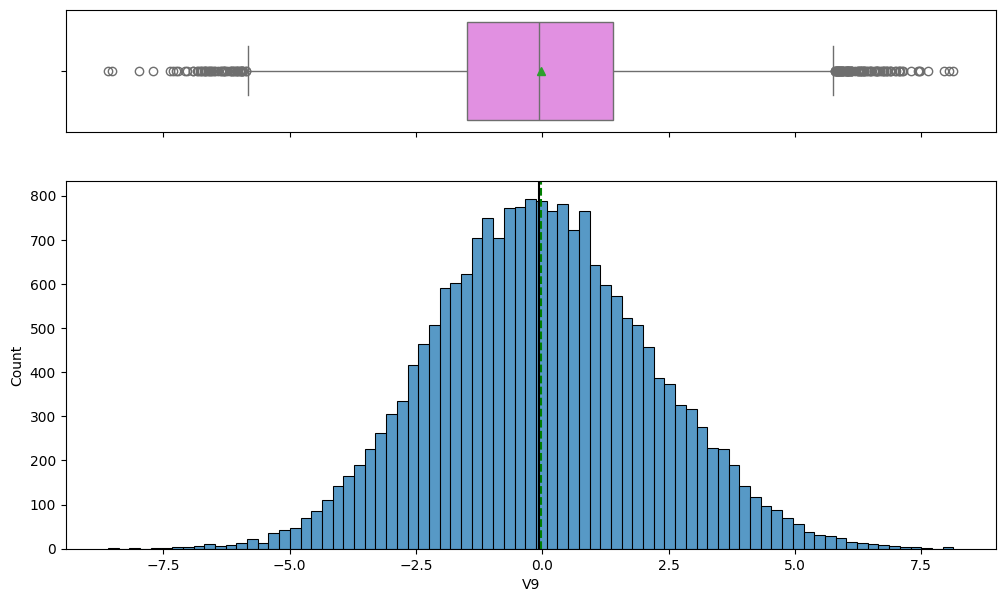

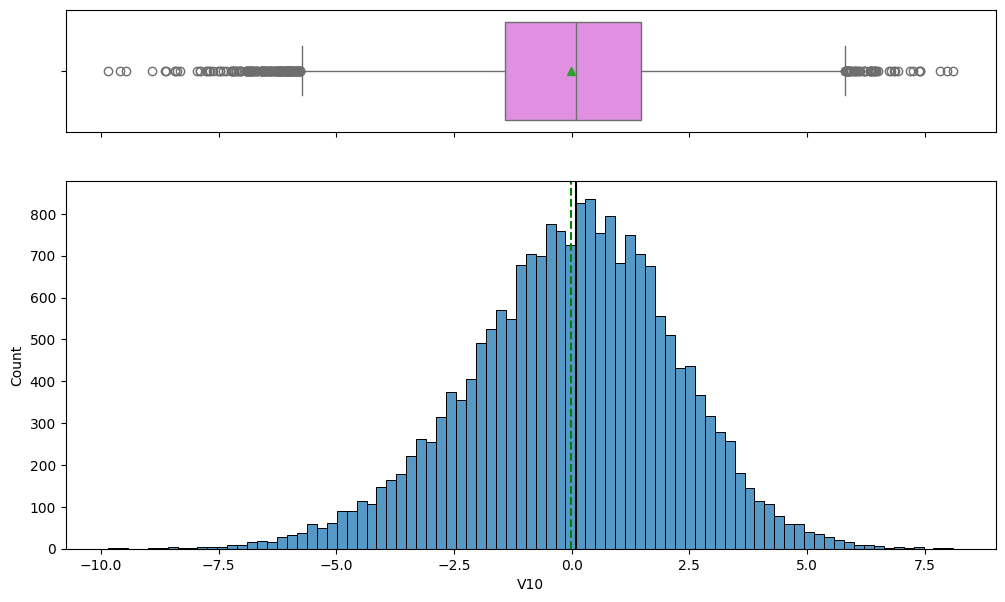

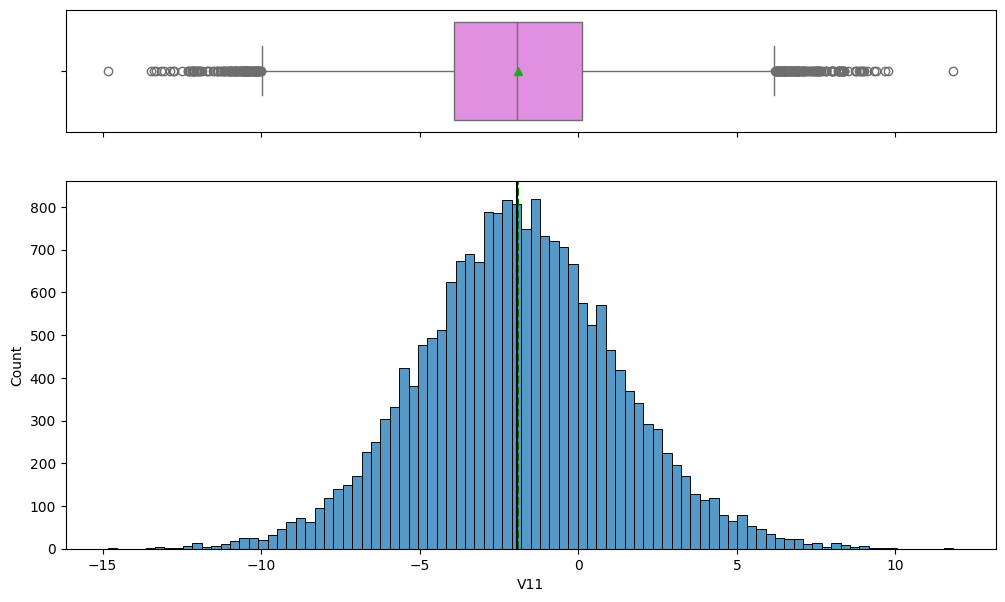

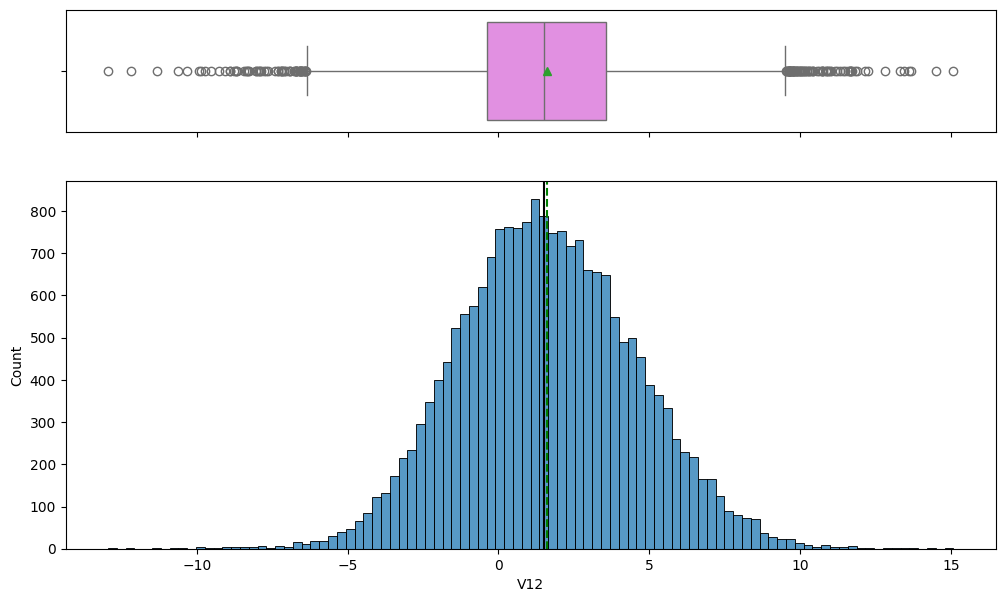

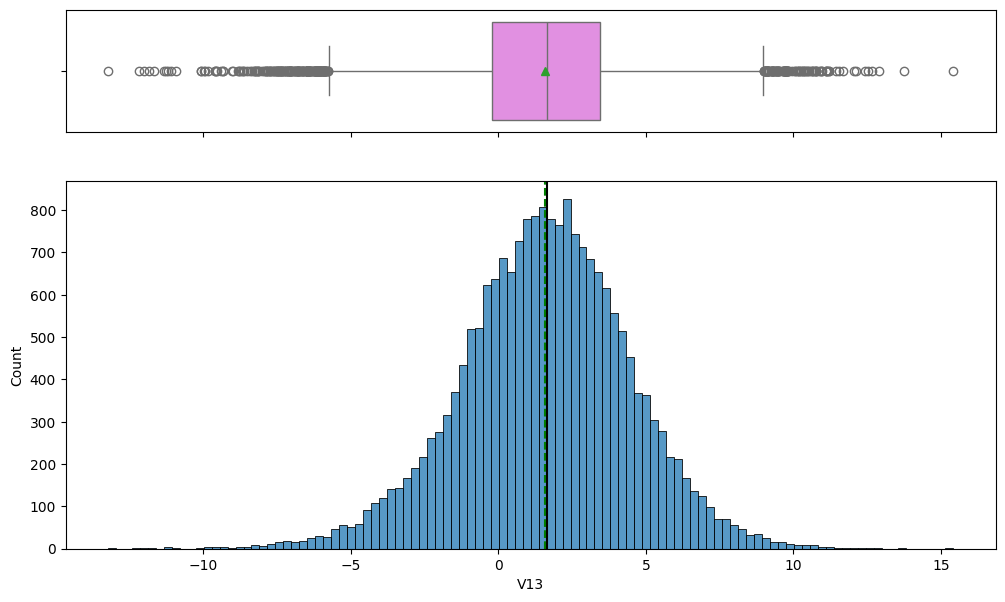

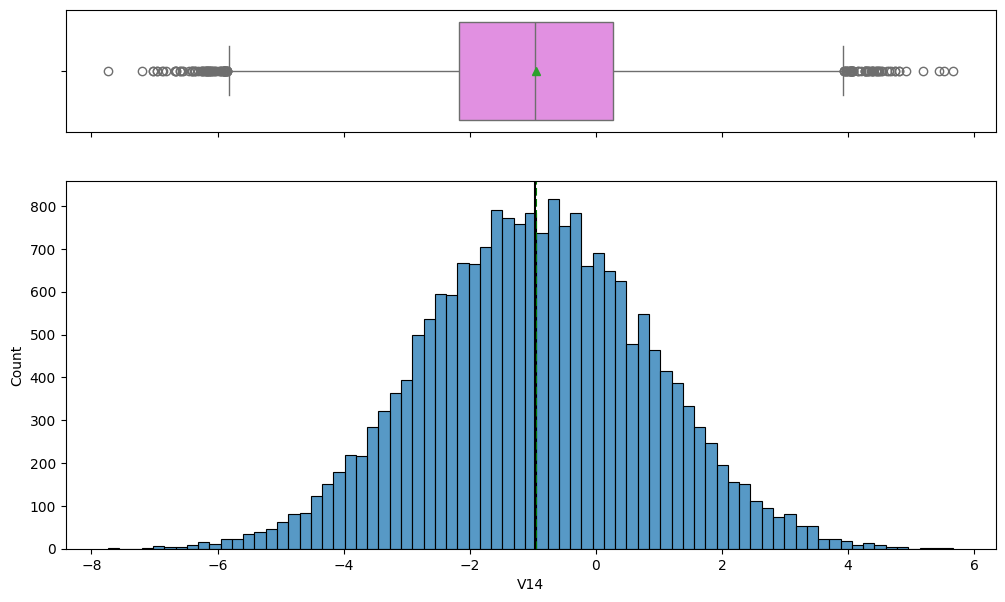

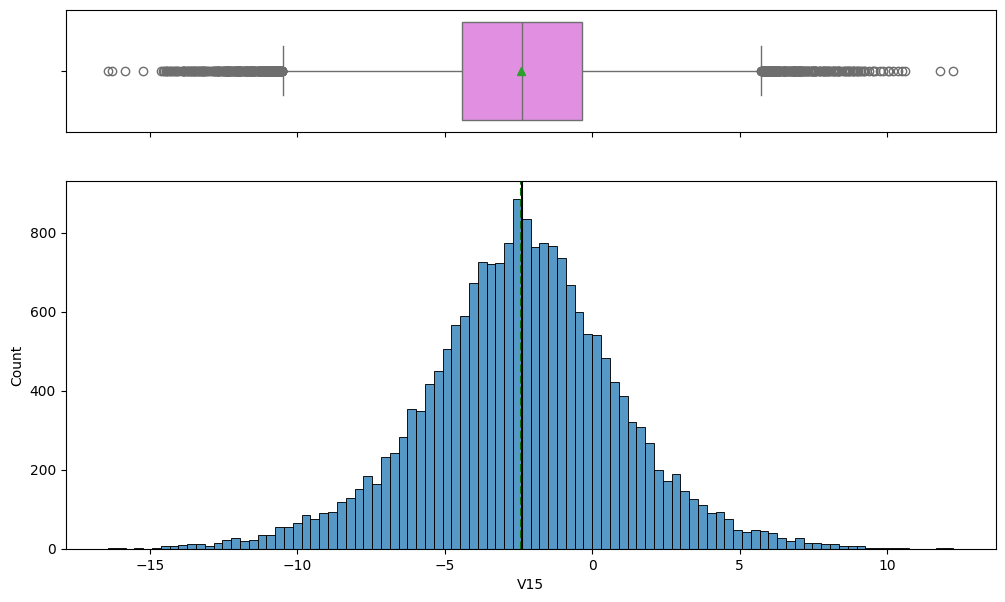

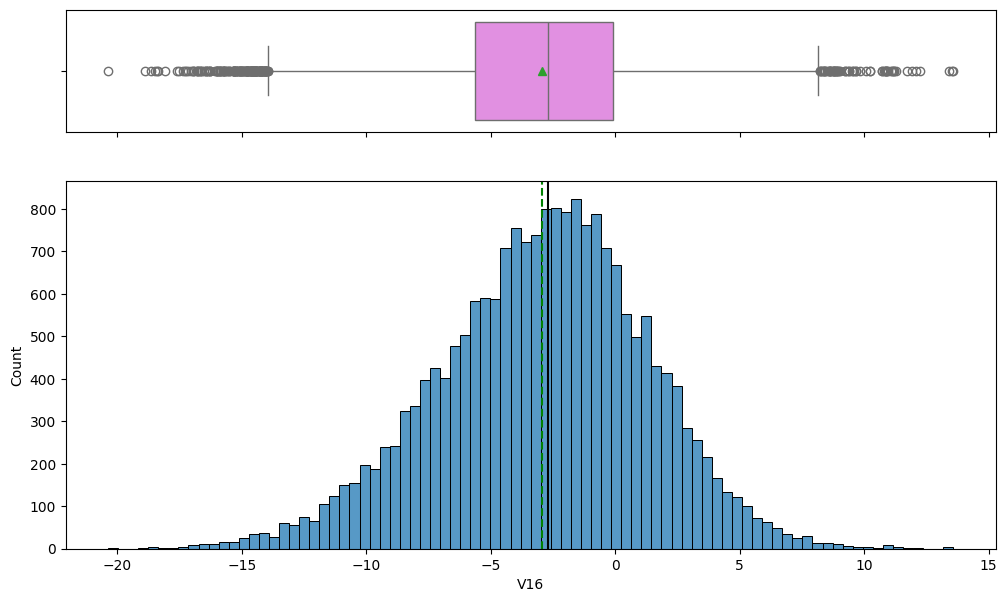

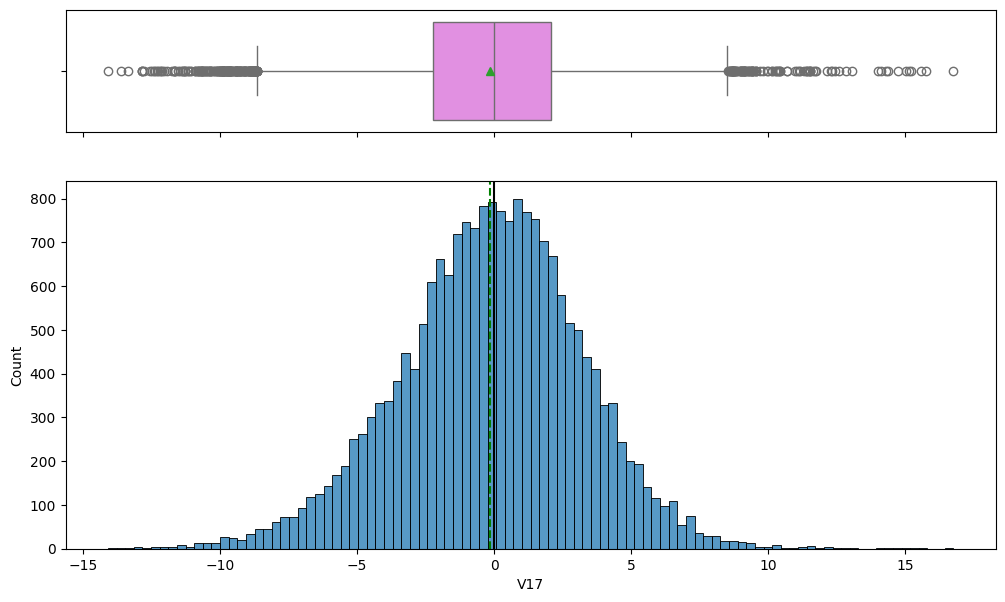

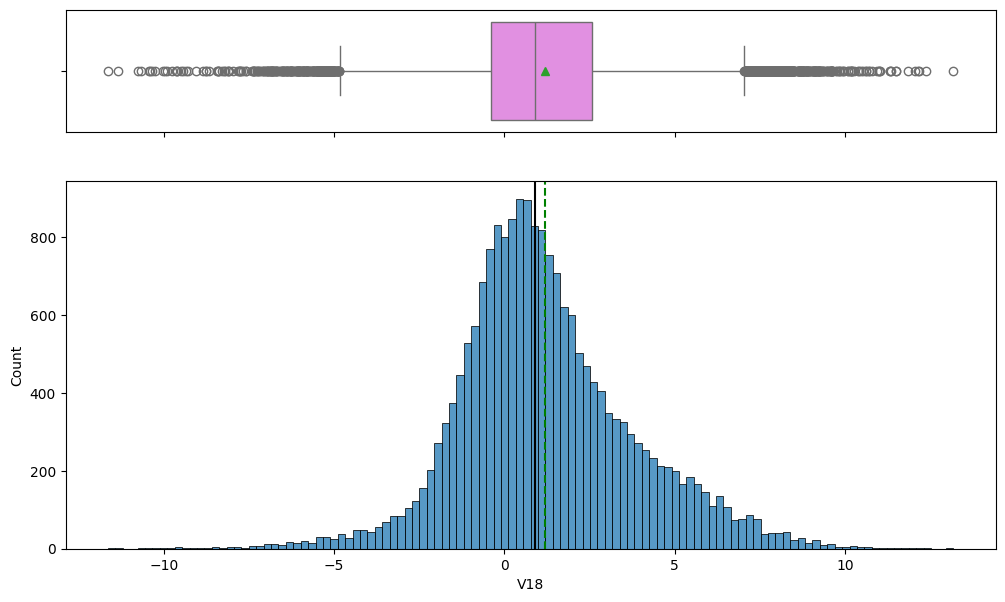

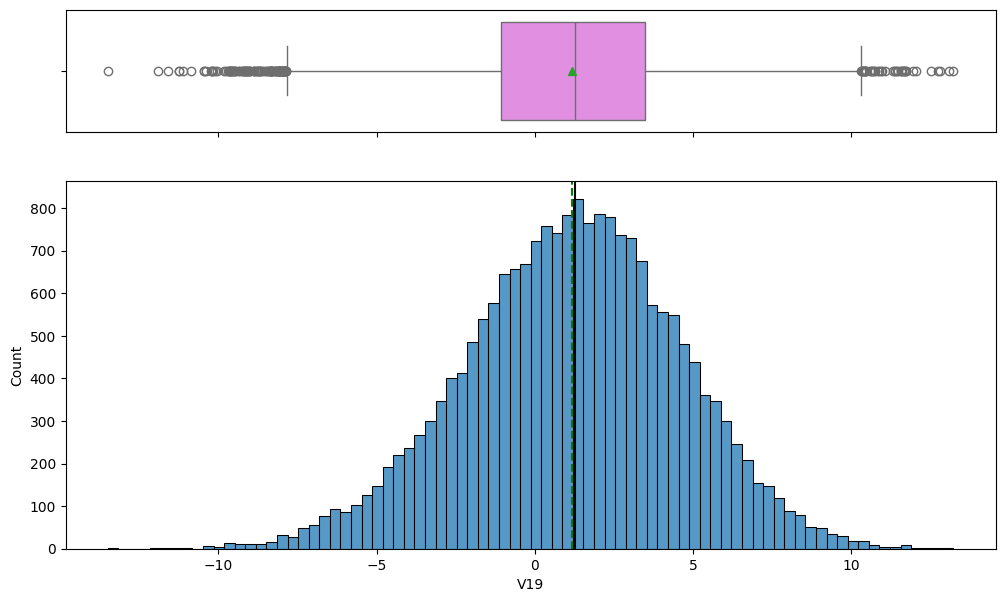

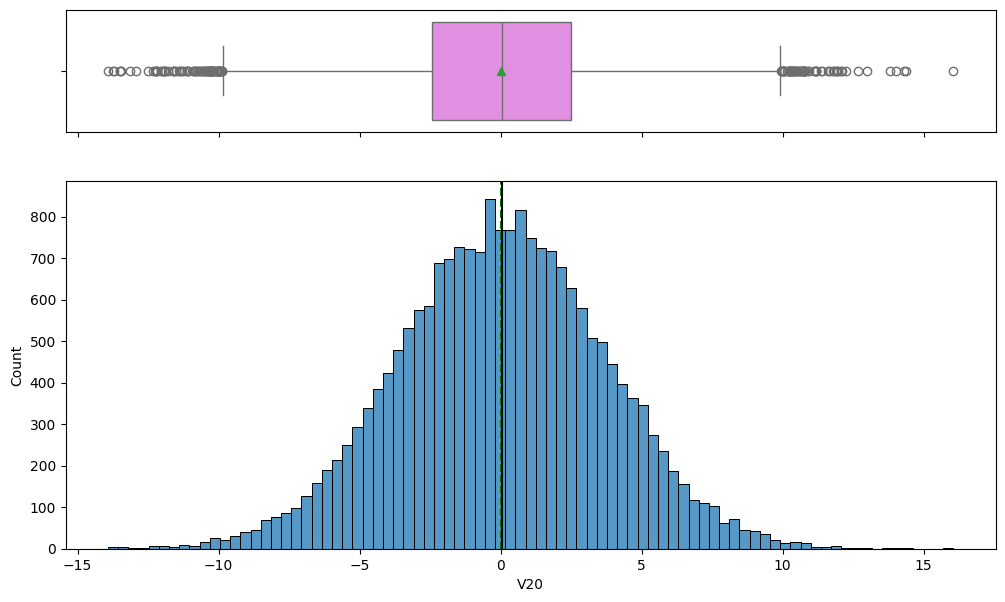

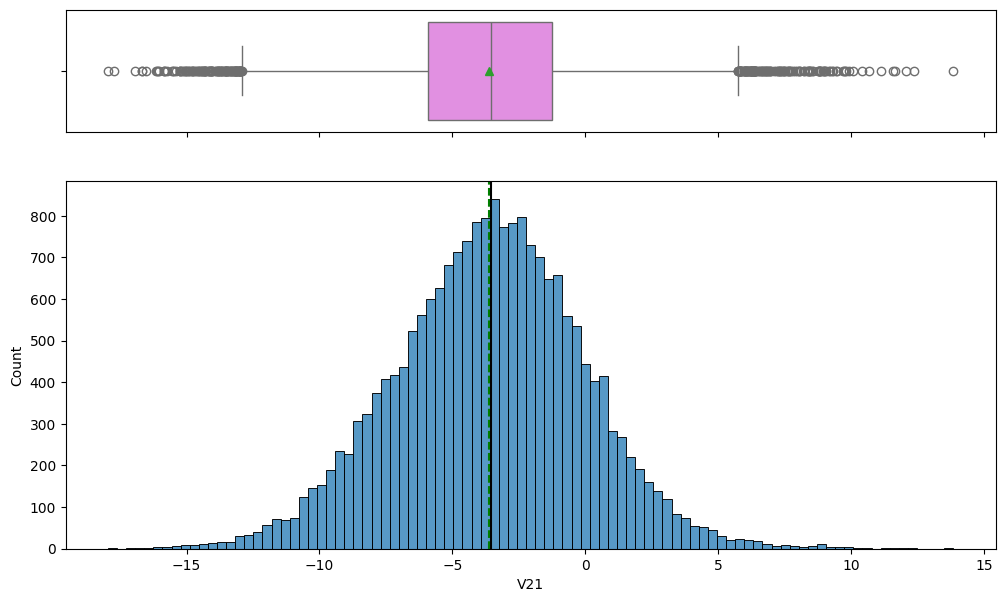

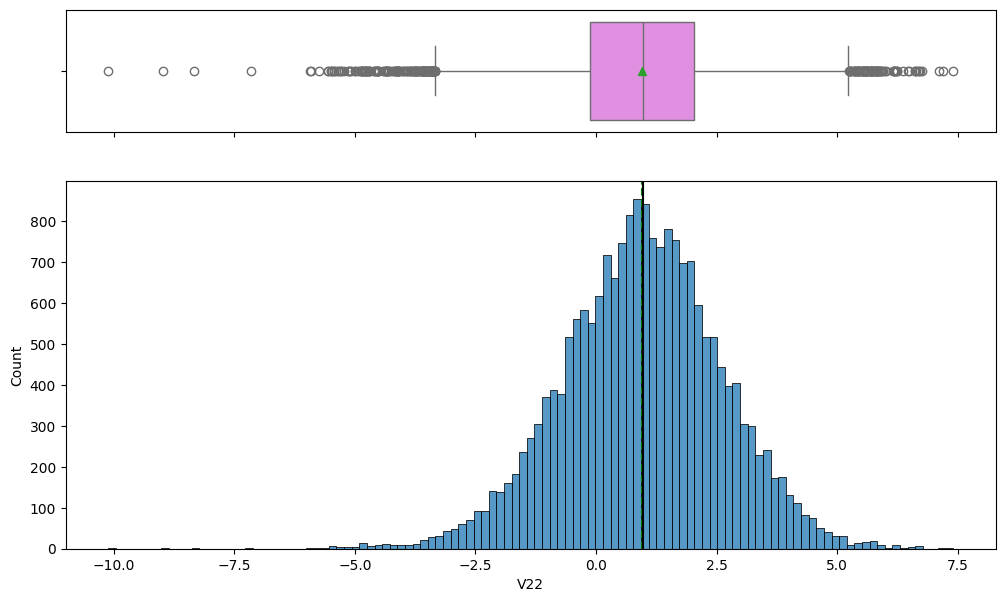

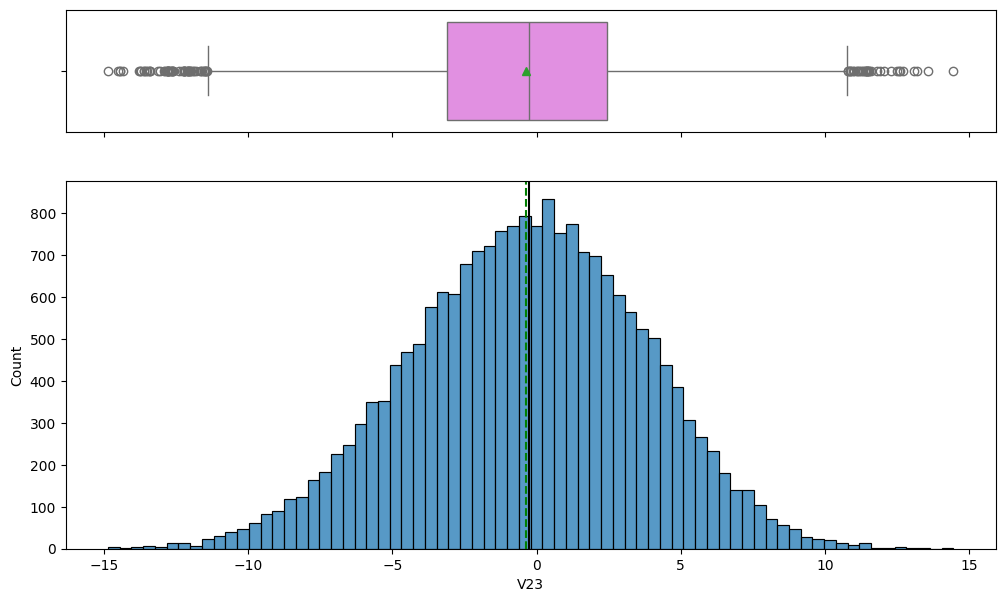

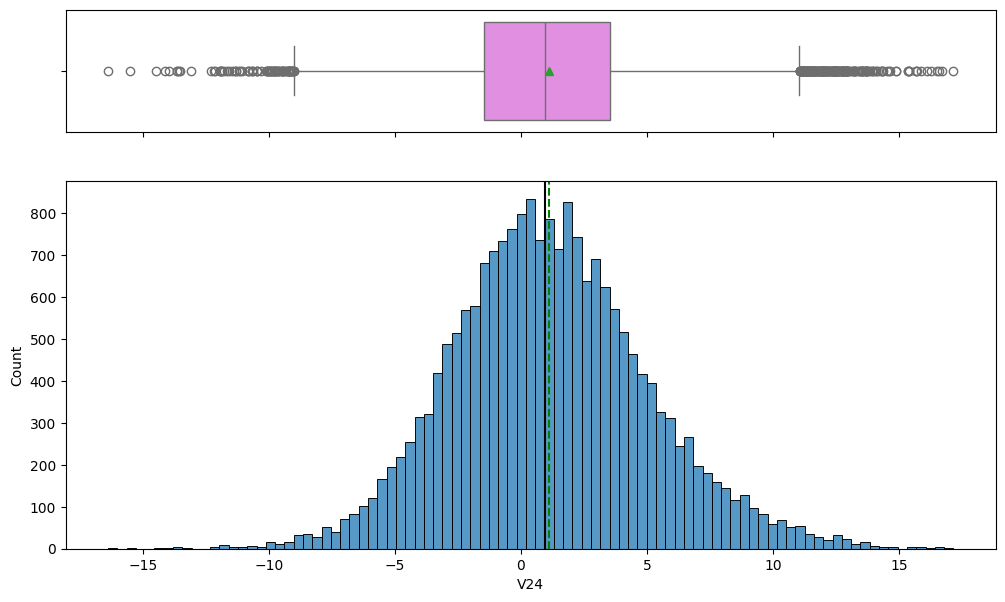

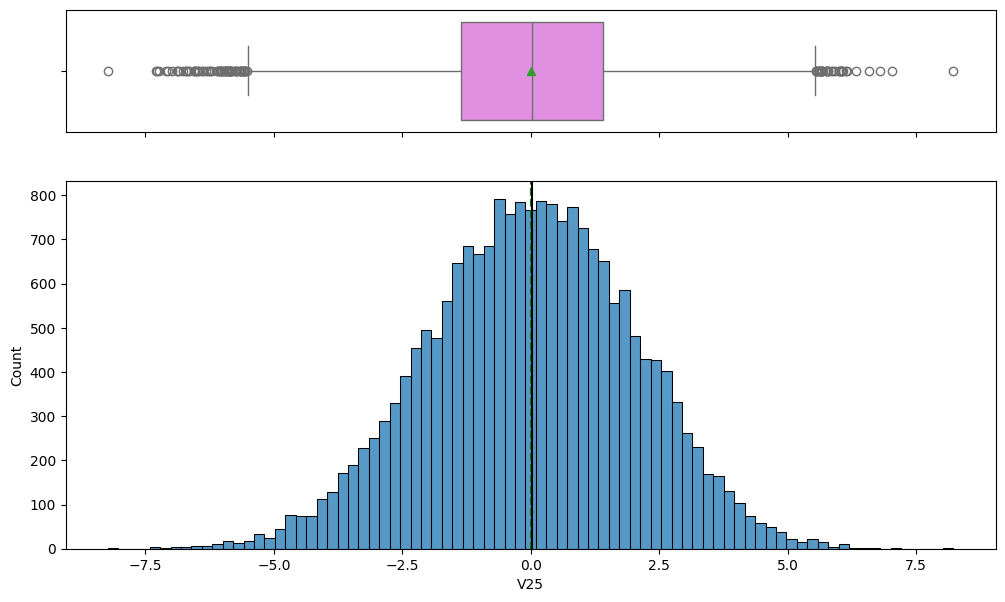

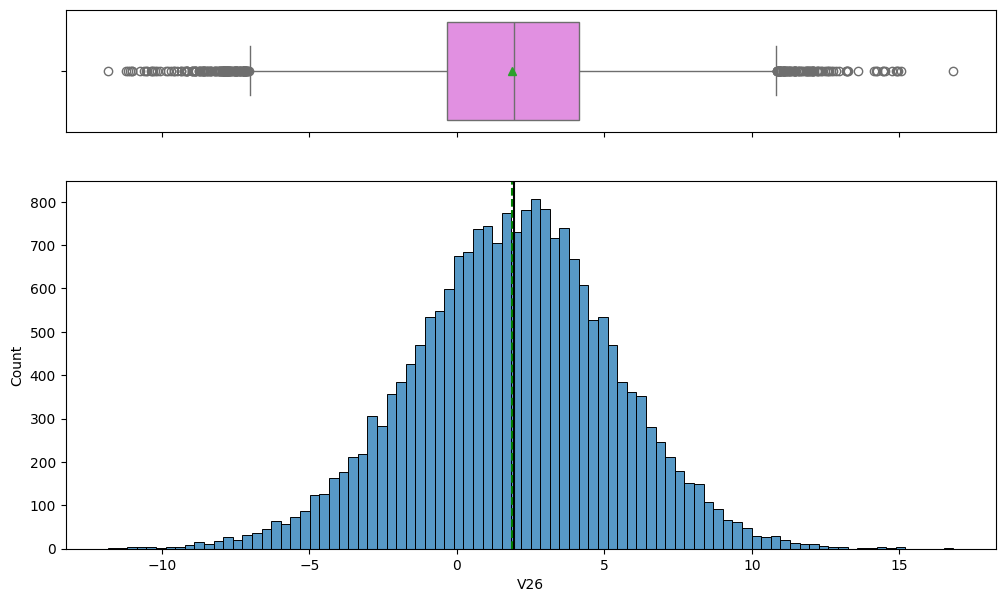

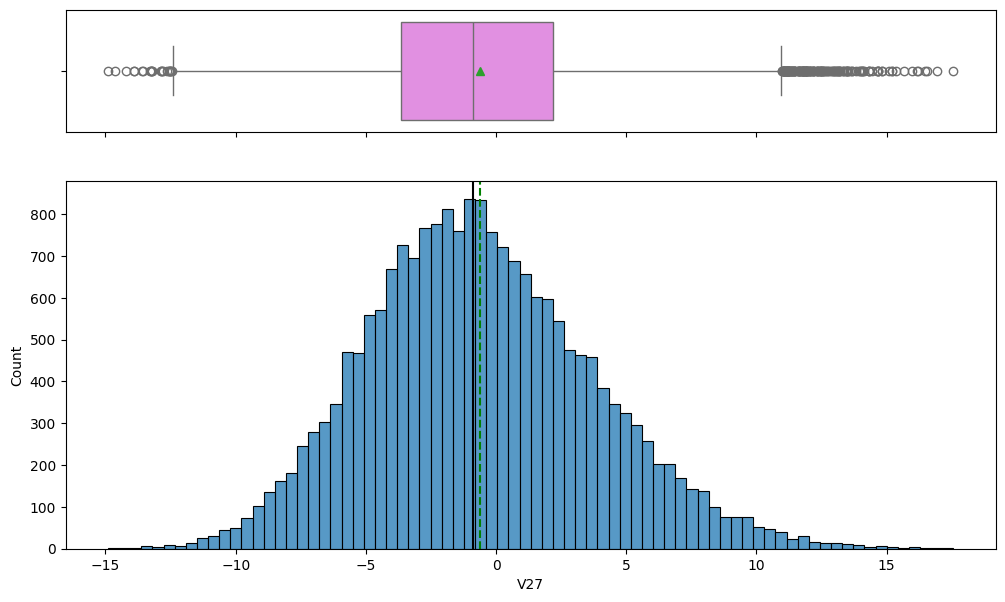

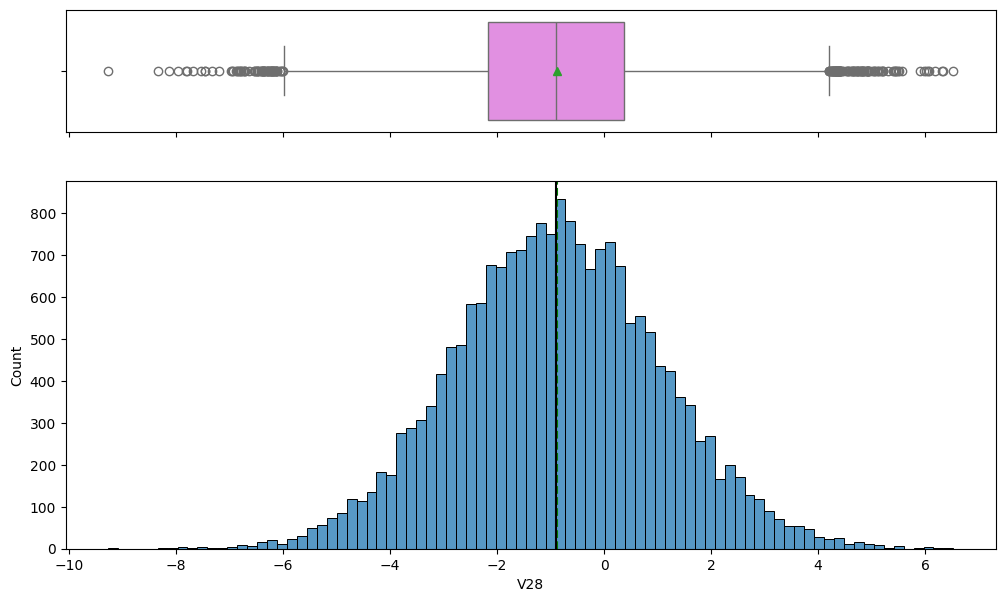

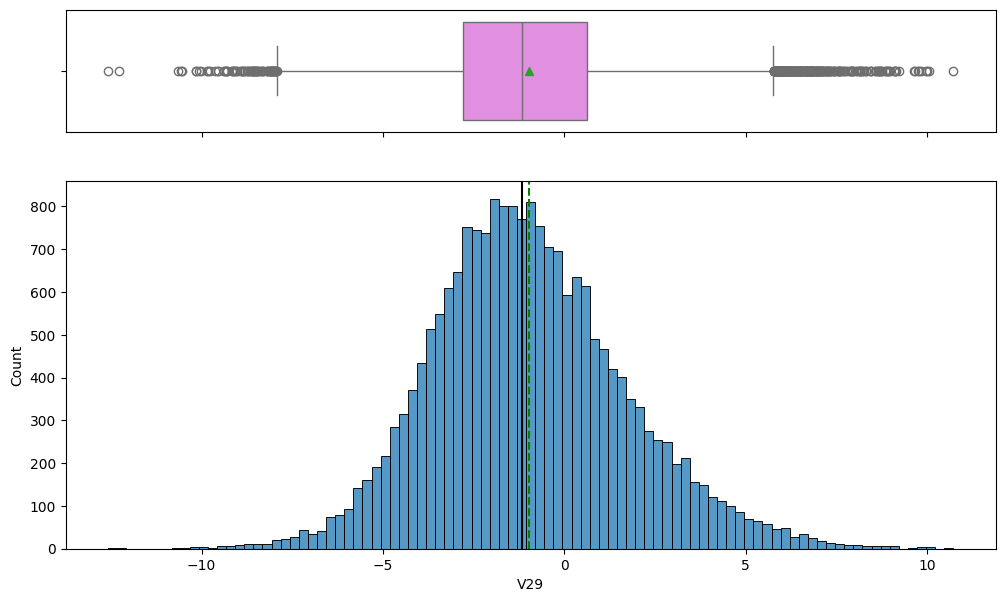

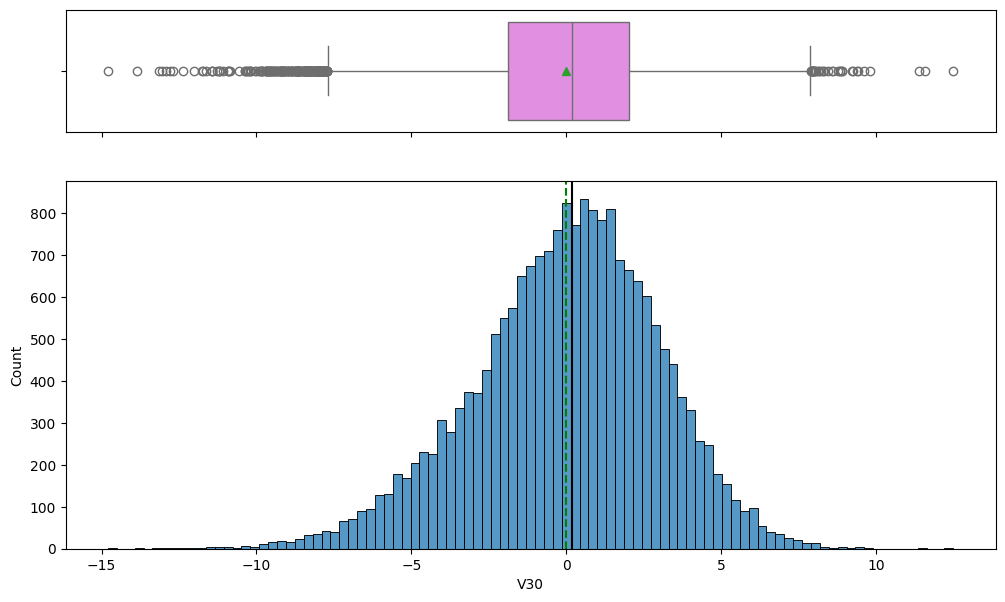

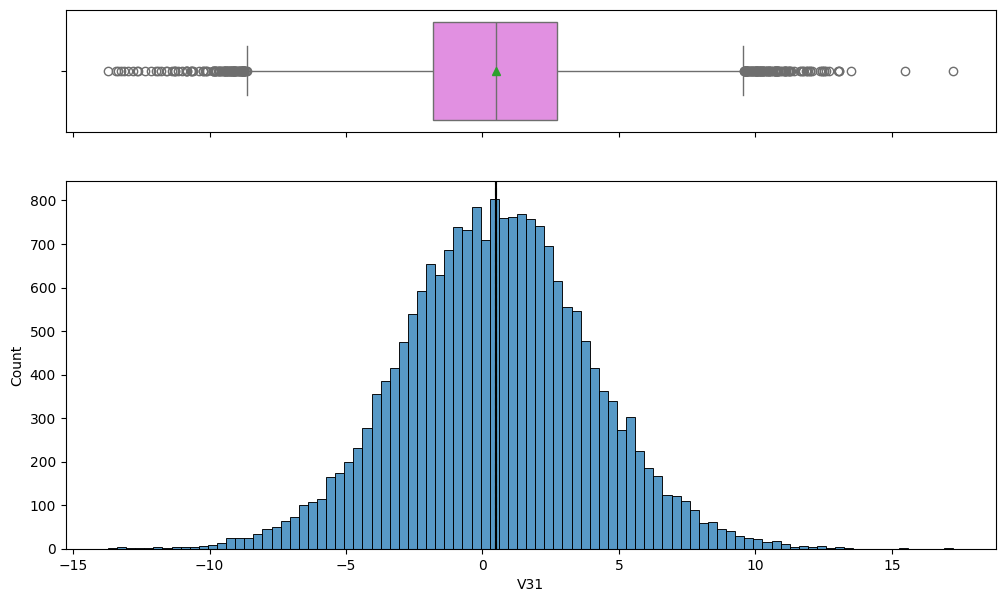

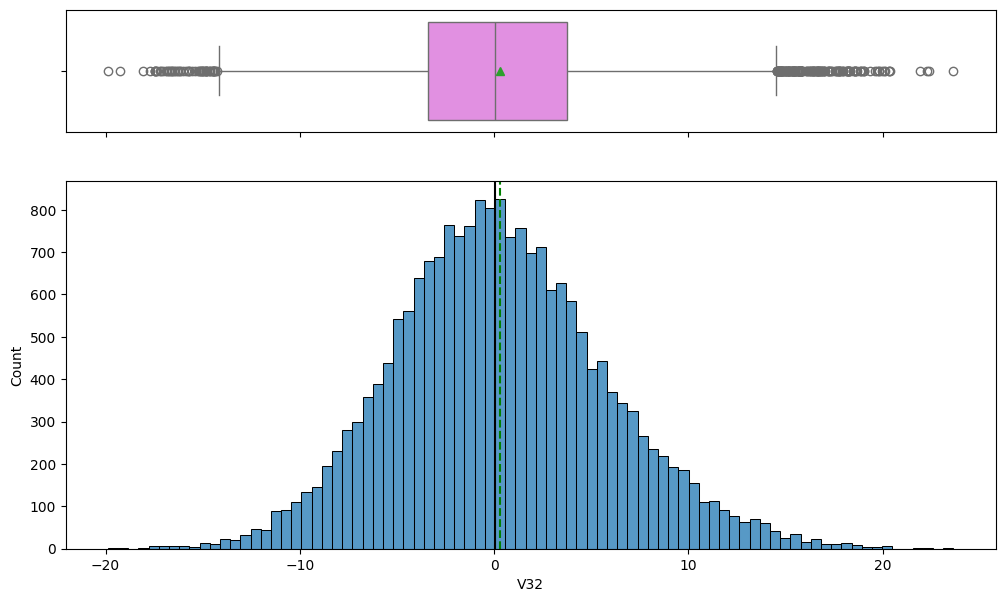

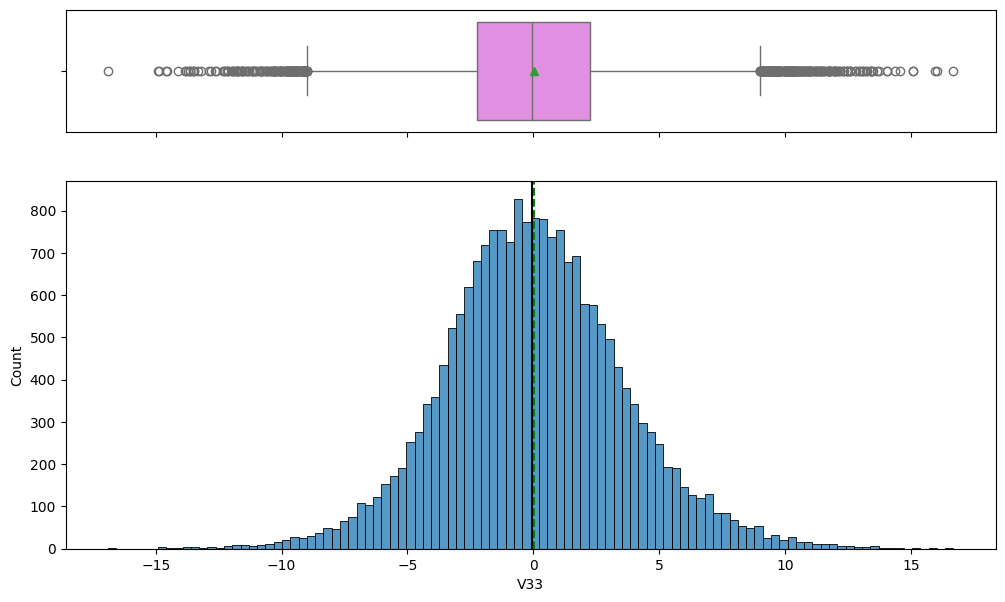

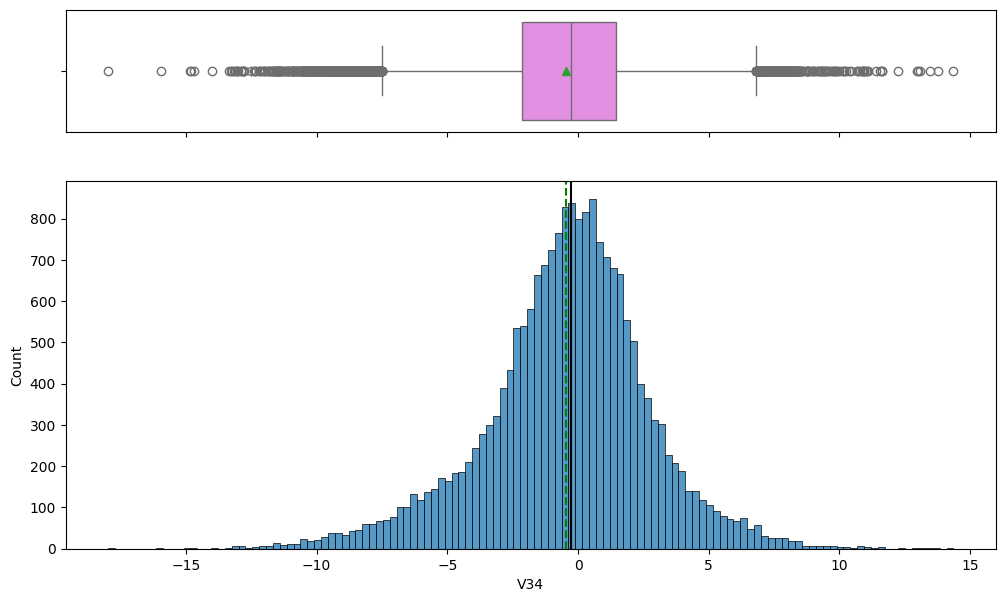

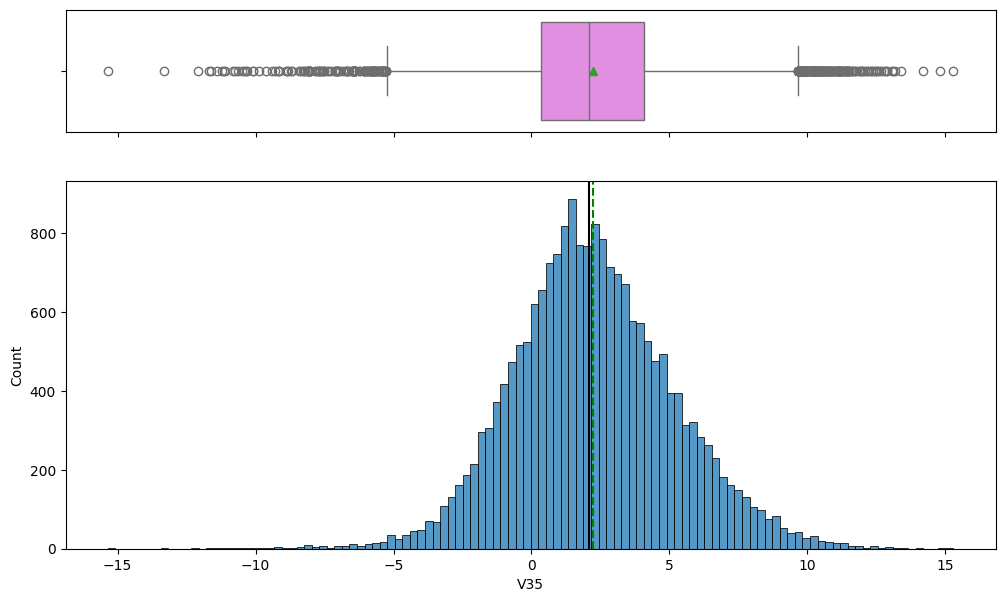

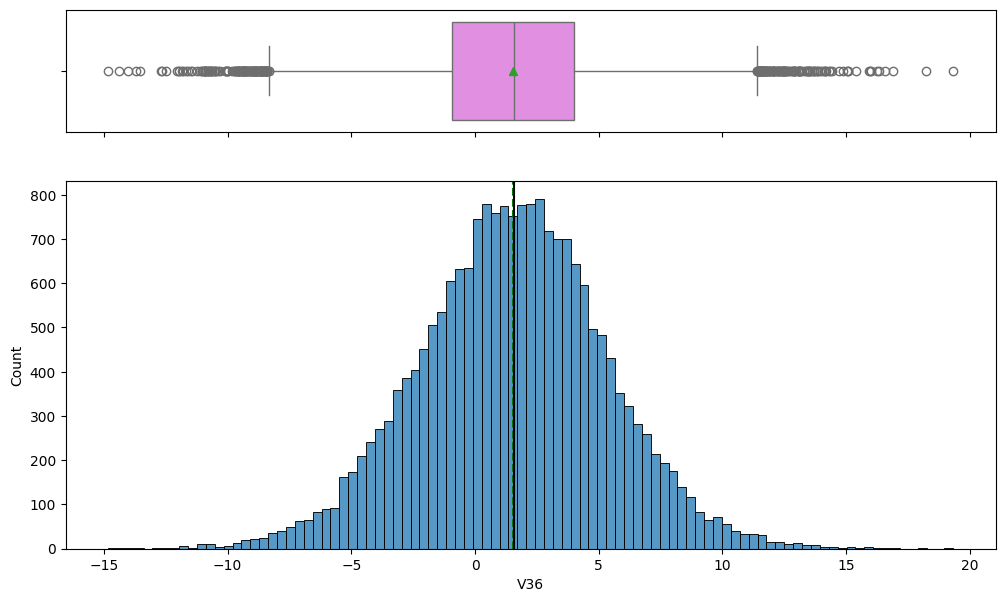

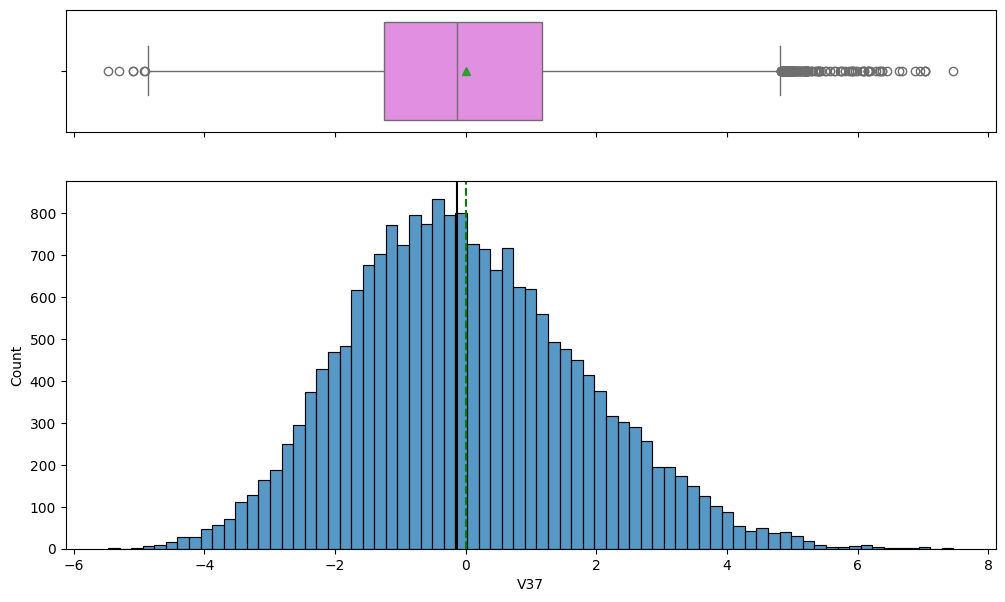

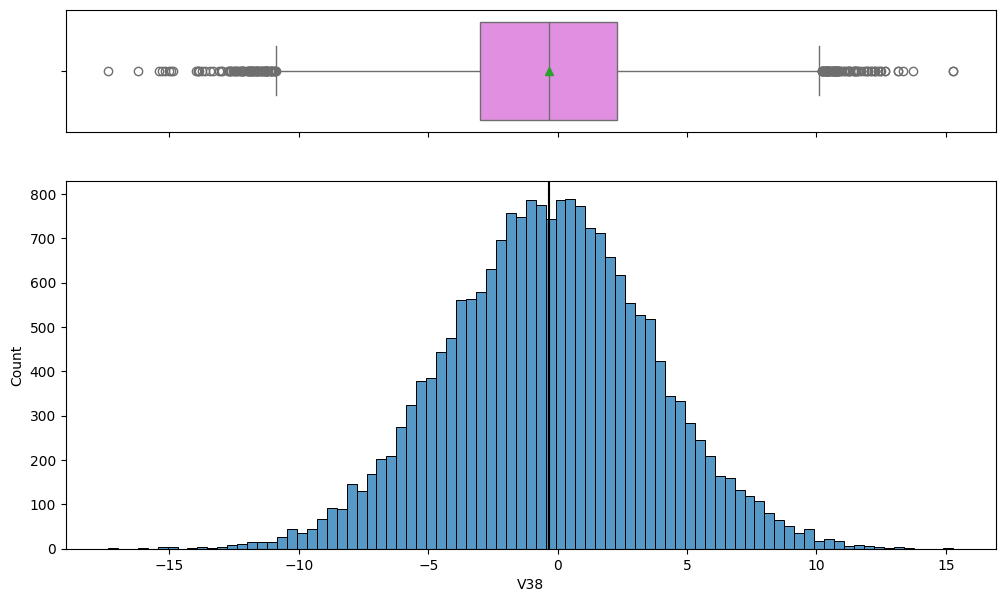

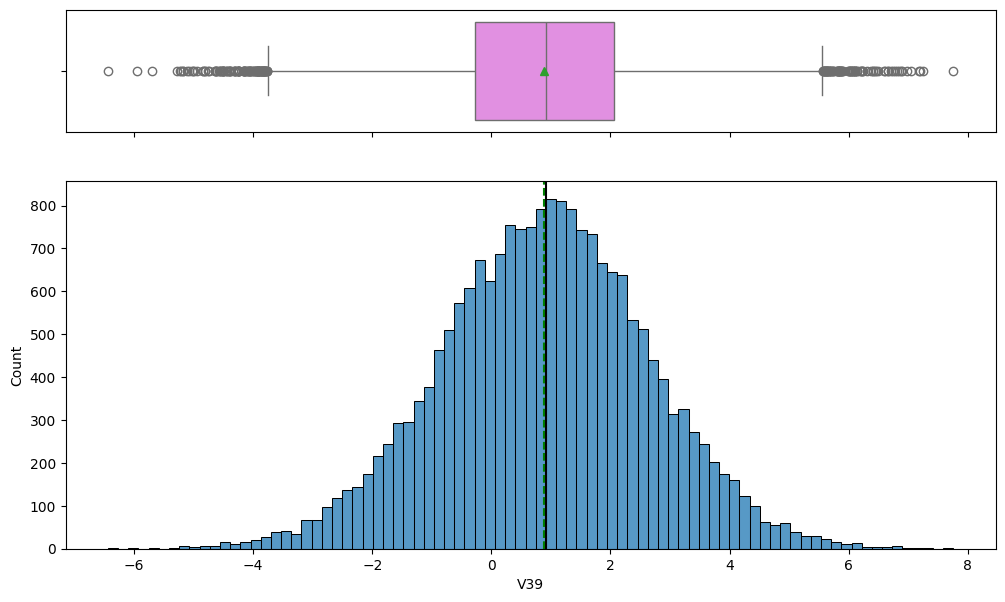

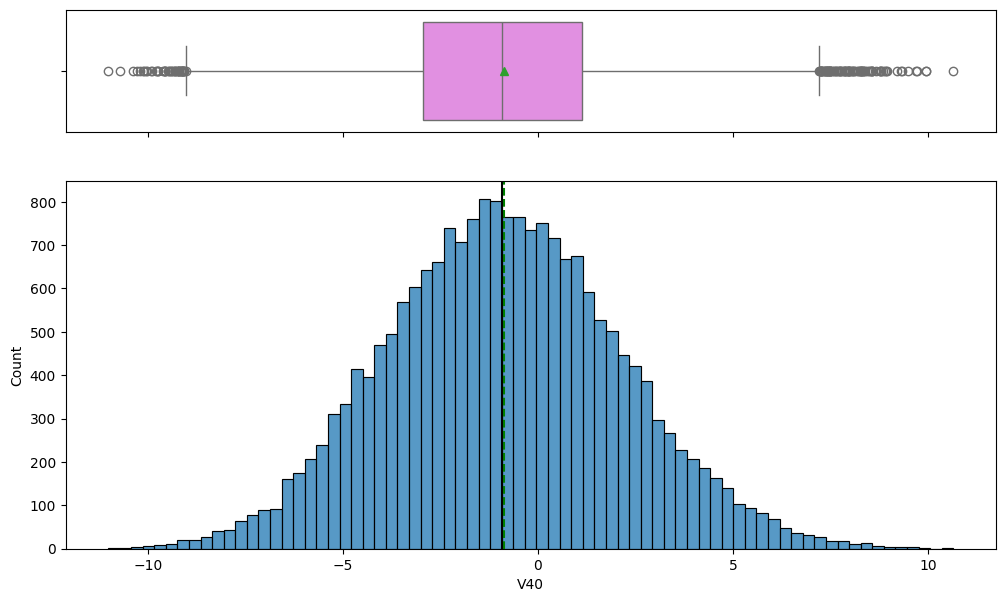

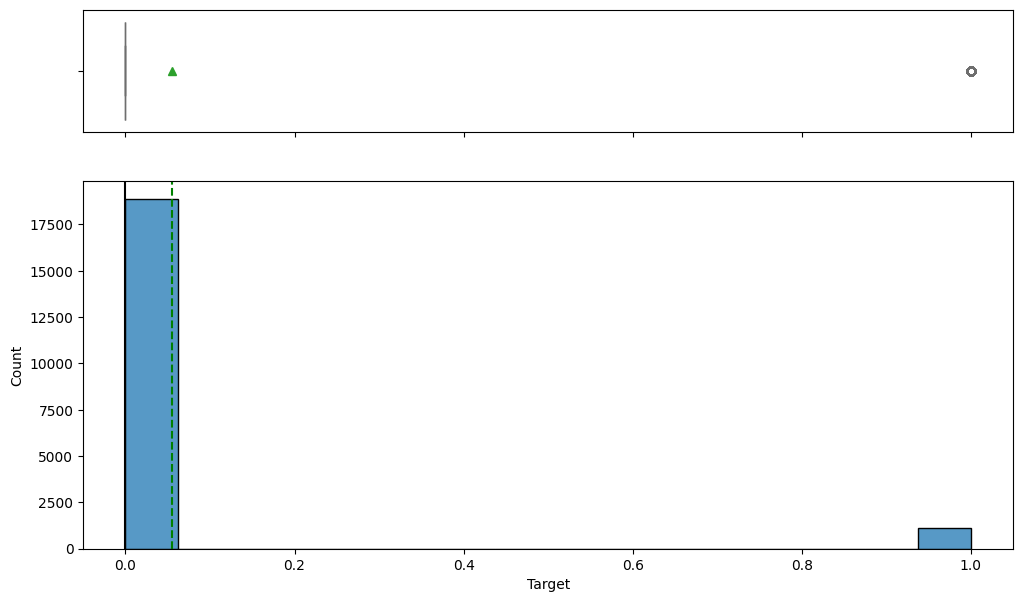

In [ ]:
for feature in df.columns[:-1]:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)

- All the variables are normally distributed
- This distribution might not be true for original data but since the provided data is ciphered, this kind of trend in distribution is possible - maybe the original data was transformed to normally distributed data.
- The outliers visible through boxplots are not incorrect readings, the values might be like this only.

### Target Variable Distribution

<Axes: xlabel='Target', ylabel='percent'>

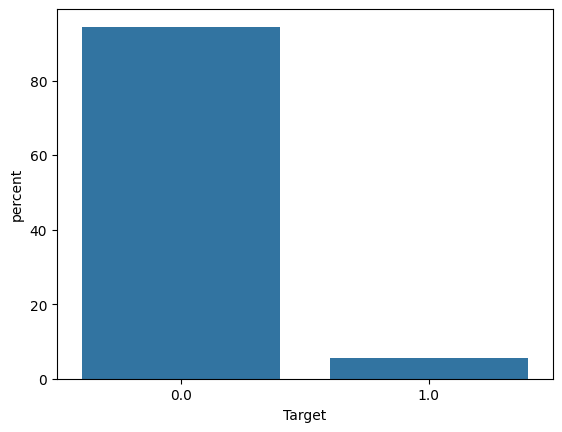

In [ ]:
sns.countplot(x="Target", data=data, stat = 'percent')

In [ ]:
df["Target"].value_counts(1)

Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64

In [ ]:
df_test["Target"].value_counts(1)

Target
0    0.9436
1    0.0564
Name: proportion, dtype: float64

- The distribution of 0s and 1s is the same in both Train and Test sets.
- 94.5% of the observations are negative and only 5.5% of the observations are a positive representing failure.

## Bivariate Analysis

### Correlation Check

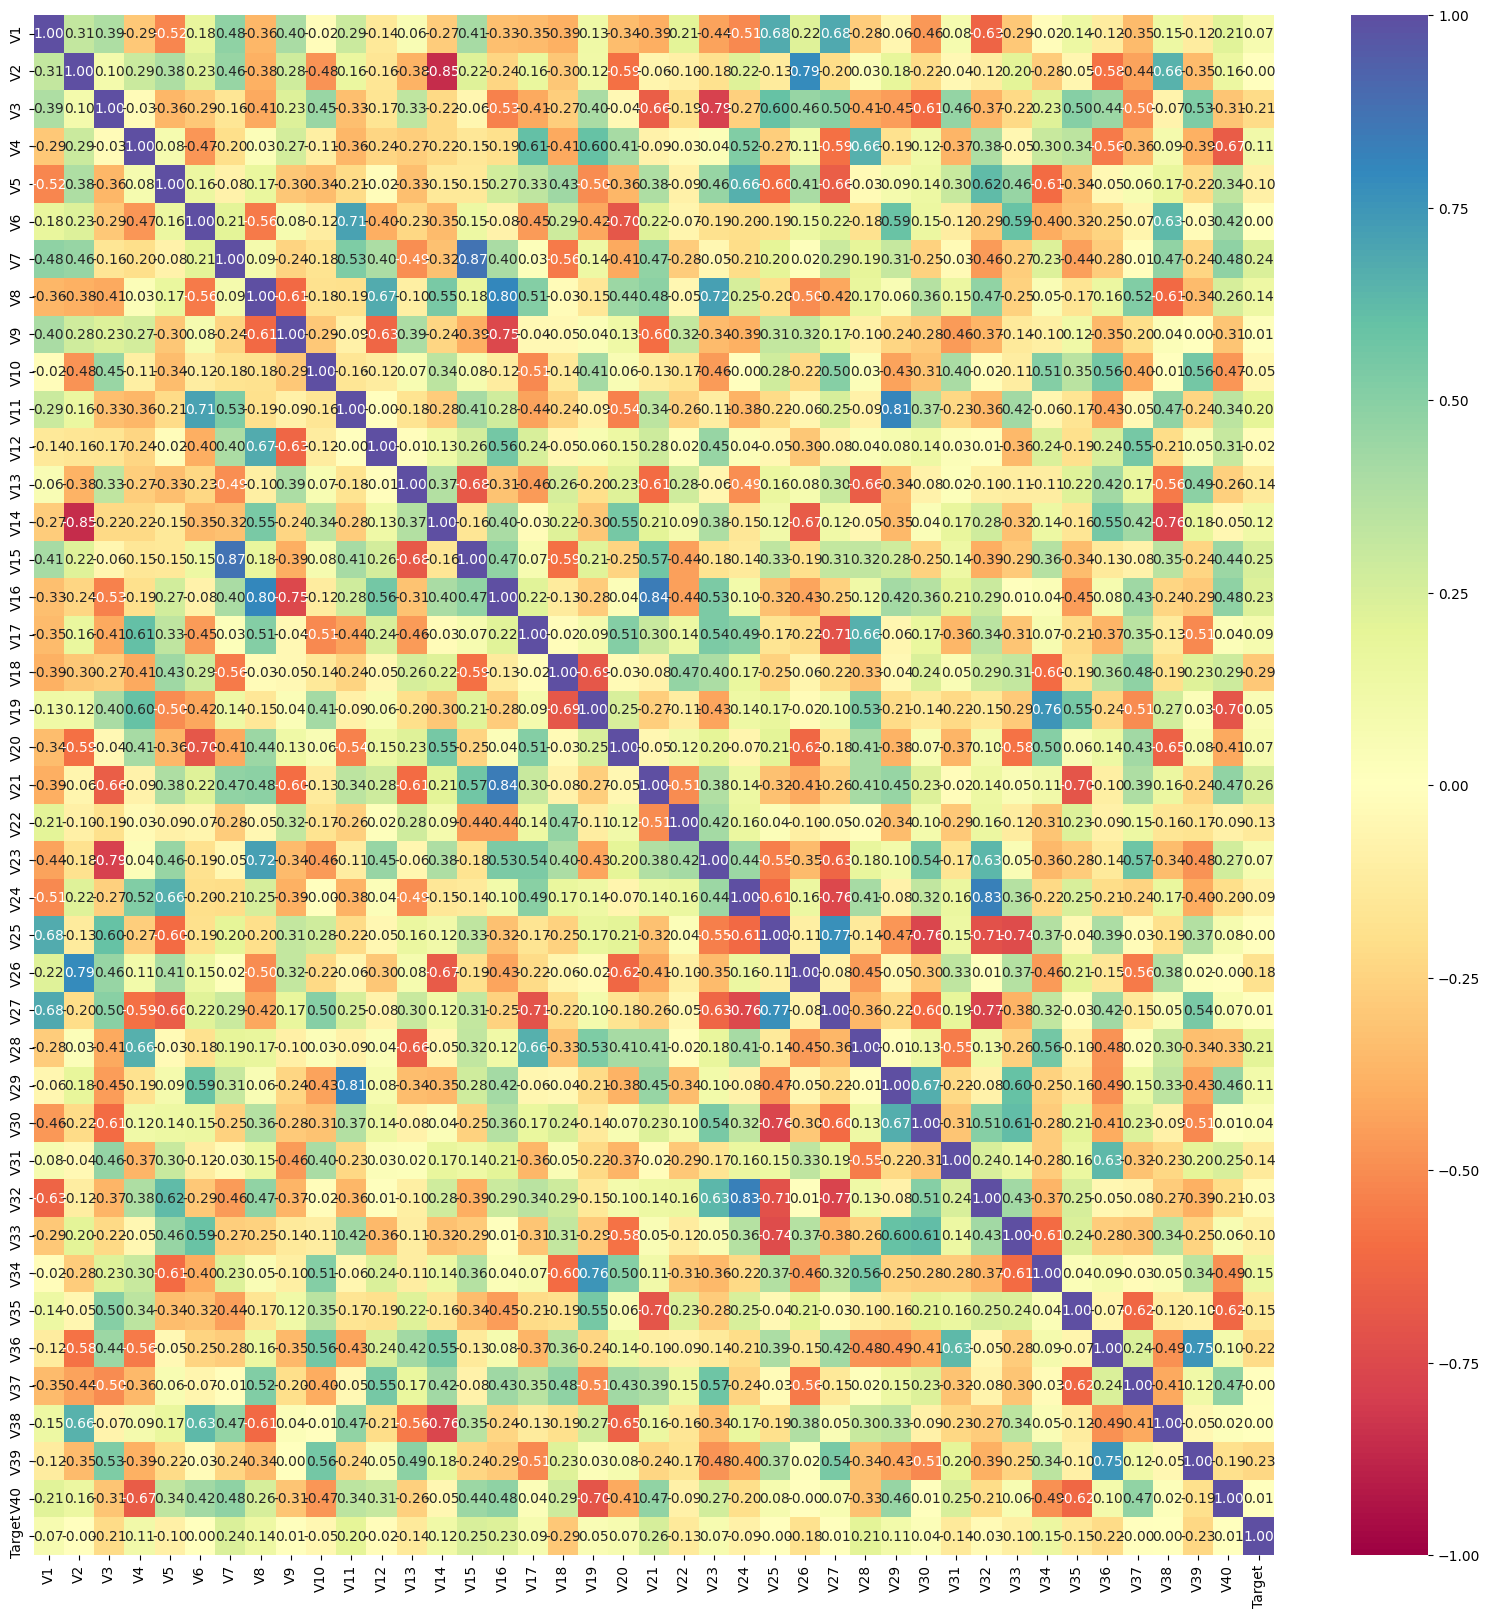

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("Target")

plt.figure(figsize=(20, 20))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Variables through V23 to V33 how higher correlation than other variables.


# **Data Preprocessing**

## Data Preparation for Modeling

In [ ]:
# Dividing train data into X and y
X = data.drop(["Target"], axis=1)
y = data["Target"]

**Since we already have a separate test set, we don't need to divide data into train, valiation and test**


In [ ]:
# Splitting data into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

In [ ]:
# Checking the number of rows and columns in the X_train data
X_train.shape

(15000, 40)

In [ ]:
# Checking the number of rows and columns in the X_val data
X_val.shape

(5000, 40)

In [ ]:
# Dividing test data into X_test and y_test
X_test = data_test.drop(["Target"], axis=1)
y_test = data_test["Target"]

In [ ]:
# Checking the number of rows and columns in the X_test data
X_test.shape

(5000, 40)

## Missing Value Imputation


- There were few missing values in V1 and V2, we will impute them using the median.
- And to avoid data leakage we will impute missing values after splitting train data into train and validation sets.




In [ ]:
imputer = SimpleImputer(strategy="median")

In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

- All the missing values have been imputed

In [ ]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# **Model Building**

## Model Evaluation Criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

## Utility Functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='macro')  # to compute Recall
    precision = precision_score(target, pred, average='macro')  # to compute Precision
    f1 = f1_score(target, pred, average='macro')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,}, index = [0]
    )

    return df_perf

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer of 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [ ]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_0 = Sequential()
model_0.add(Dense(7,activation="relu",input_dim=X_train.shape[1]))
model_0.add(Dense(1,activation="sigmoid"))

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │             287 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 295 (1.15 KB)

 Trainable params: 295 (1.15 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [ ]:
start = time.time()
history = model_0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.5279 - loss: 0.4003 - val_Recall: 0.4604 - val_loss: 0.1320
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.4820 - loss: 0.1217 - val_Recall: 0.5144 - val_loss: 0.1220
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.5087 - loss: 0.1120 - val_Recall: 0.5252 - val_loss: 0.1164
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5363 - loss: 0.1066 - val_Recall: 0.5432 - val_loss: 0.1115
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5984 - loss: 0.0980 - val_Recall: 0.5683 - val_loss: 0.1076
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5737 - loss: 0.0976 - val_Recall: 0.5647 - val_loss: 0.1041
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5864 - loss: 0.0923 - val_Recall: 0.5719 - val_loss: 0.1011
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5712 - loss: 0.1012 - val_Recall: 0.5791 - val_loss: 0.0977
Epoch 9/

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.758917093276978


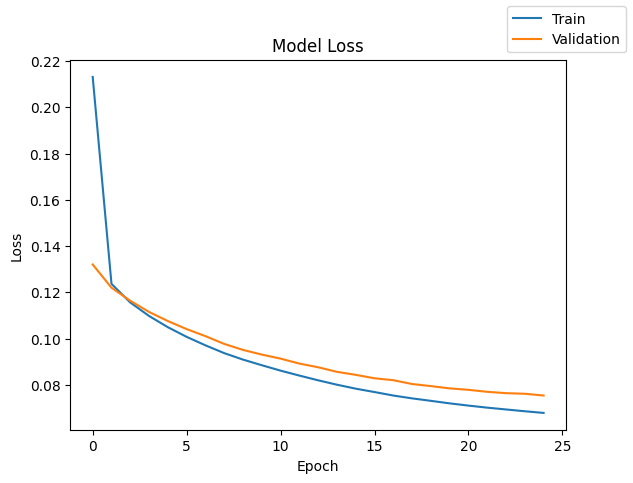

In [ ]:
plot(history,'loss')

In [ ]:
model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.983267  0.864997   0.970259  0.910169

In [ ]:
model_0_val_perf = model_performance_classification(model_0, X_val, y_val)
model_0_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0     0.984  0.871349   0.971746   0.91482

Let's check the classification reports.

In [ ]:
y_train_pred_0 = model_0.predict(X_train)
y_val_pred_0 = model_0.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print("Classification Report - Train data Model_0",end="\n\n")
cr_train_model_0 = classification_report(y_train,y_train_pred_0>0.5)
print(cr_train_model_0)

Classification Report - Train data Model_0

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     14168
         1.0       0.96      0.73      0.83       832

    accuracy                           0.98     15000
   macro avg       0.97      0.86      0.91     15000
weighted avg       0.98      0.98      0.98     15000



In [ ]:
print("Classification Report - Validation data Model_0",end="\n\n")
cr_val_model_0 = classification_report(y_val,y_val_pred_0>0.5)
print(cr_val_model_0)

Classification Report - Validation data Model_0

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4722
         1.0       0.96      0.74      0.84       278

    accuracy                           0.98      5000
   macro avg       0.97      0.87      0.91      5000
weighted avg       0.98      0.98      0.98      5000



- Although we see that we have achieved a good recall on the first model, we should also try more models to see how much we can improve.

# **Model Performance Improvement**

## Model 1

- Let's try adding another layer to see if we can improve our model's performance.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_1.add(Dense(7,activation="relu"))
model_1.add(Dense(1,activation="sigmoid"))

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             574 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [ ]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.3605 - loss: 0.5211 - val_Recall: 0.3489 - val_loss: 0.1555
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.3761 - loss: 0.1440 - val_Recall: 0.4353 - val_loss: 0.1284
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.4418 - loss: 0.1329 - val_Recall: 0.4640 - val_loss: 0.1168
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.4520 - loss: 0.1108 - val_Recall: 0.5396 - val_loss: 0.1093
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5546 - loss: 0.1075 - val_Recall: 0.5719 - val_loss: 0.1036
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.5813 - loss: 0.1027 - val_Recall: 0.6223 - val_loss: 0.0985
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6065 - loss: 0.0914 - val_Recall: 0.6475 - val_loss: 0.0939
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.6132 - loss: 0.0857 - val_Recall: 0.6871 - val_loss: 0.0900
Epoch 9/

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  17.87233543395996


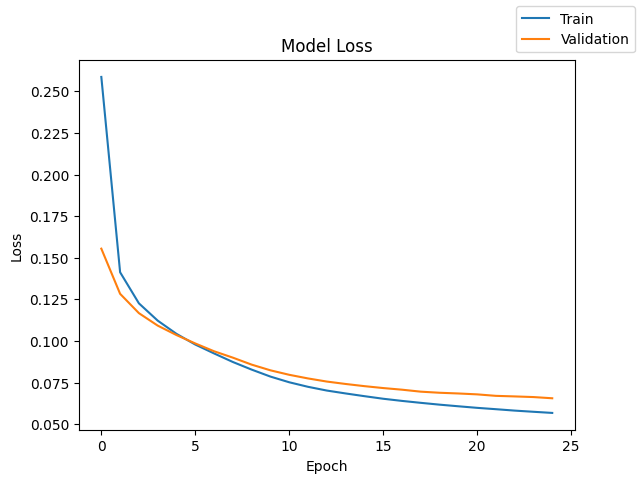

In [ ]:
plot(history,'loss')

In [ ]:
model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0    0.9874  0.898863   0.978154   0.93447

In [ ]:
model_1_val_perf = model_performance_classification(model_1, X_val, y_val)
model_1_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0    0.9868  0.898222   0.972576  0.931817

In [ ]:
y_train_pred_1 = model_1.predict(X_train)
y_val_pred_1 = model_1.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print("Classification Report - Train data Model_1", end="\n\n")
cr_train_model_1 = classification_report(y_train, y_train_pred_1 > 0.5)
print(cr_train_model_1)

Classification Report - Train data Model_1

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     14168
         1.0       0.97      0.80      0.88       832

    accuracy                           0.99     15000
   macro avg       0.98      0.90      0.93     15000
weighted avg       0.99      0.99      0.99     15000



In [ ]:
print("Classification Report - Validation data Model_1", end="\n\n")
cr_val_model_1 = classification_report(y_val, y_val_pred_1 > 0.5)
print(cr_val_model_1)

Classification Report - Validation data Model_1

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4722
         1.0       0.96      0.80      0.87       278

    accuracy                           0.99      5000
   macro avg       0.97      0.90      0.93      5000
weighted avg       0.99      0.99      0.99      5000



We observe that the model's performance has increased slightly by adding another layer and it is performing very well on both training and validation set showing signs of overfitting. Thus, we should introduce some Regularization.

## Model 2

To introduce Regularization in our model, let's set the dropout to 50% after adding the first hidden layer. This step will randomly drop 50% of the neurons before proceeding to the next layer, reducing overfitting.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
from tensorflow.keras.layers import Dropout
model_2 = Sequential()
model_2.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_2.add(Dropout(0.5)) #Setting up dropout to 50%
model_2.add(Dense(7,activation="relu"))
model_2.add(Dense(3, activation = "relu"))
model_2.add(Dense(1,activation="sigmoid"))

In [ ]:
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             574 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 707 (2.76 KB)

 Trainable params: 707 (2.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [ ]:
start = time.time()
history = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.0000e+00 - loss: 0.3028 - val_Recall: 0.0000e+00 - val_loss: 0.1825
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0000e+00 - loss: 0.2108 - val_Recall: 0.0000e+00 - val_loss: 0.1650
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0000e+00 - loss: 0.1971 - val_Recall: 0.0000e+00 - val_loss: 0.1547
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0000e+00 - loss: 0.1912 - val_Recall: 0.0000e+00 - val_loss: 0.1479
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0000e+00 - loss: 0.1677 - val_Recall: 0.0000e+00 - val_loss: 0.1446
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0000e+00 - loss: 0.1604 - val_Recall: 0.0000e+00 - val_loss: 0.1402
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0000e+00 - loss: 0.1619 - val_Recall: 0.0000e+00 - val_loss: 0.1360
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0000e+00 - l

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  18.173407554626465


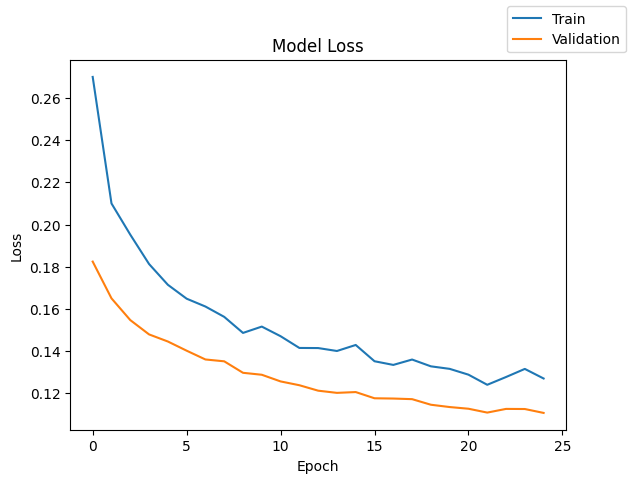

In [ ]:
plot(history,'loss')

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy  Recall  Precision  F1 Score
0  0.944533     0.5   0.472267  0.485738

In [ ]:
model_2_val_perf = model_performance_classification(model_2, X_val, y_val)
model_2_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy  Recall  Precision  F1 Score
0    0.9444     0.5     0.4722  0.485703

In [ ]:
y_train_pred_2 = model_2.predict(X_train)
y_val_pred_2 = model_2.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print("Classification Report - Train data Model_2", end="\n\n")
cr_train_model_2 = classification_report(y_train, y_train_pred_2 > 0.5)
print(cr_train_model_2)

Classification Report - Train data Model_2

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     14168
         1.0       0.00      0.00      0.00       832

    accuracy                           0.94     15000
   macro avg       0.47      0.50      0.49     15000
weighted avg       0.89      0.94      0.92     15000



In [ ]:
print("Classification Report - Validation data Model_2", end="\n\n")
cr_val_model_2 = classification_report(y_val, y_val_pred_2 > 0.5)
print(cr_val_model_2)

Classification Report - Validation data Model_2

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4722
         1.0       0.00      0.00      0.00       278

    accuracy                           0.94      5000
   macro avg       0.47      0.50      0.49      5000
weighted avg       0.89      0.94      0.92      5000



We observe that the recall value has reduced after adding dropout, showing that the model has generalized a little bit.

## Model 3

As we have are dealing with an imbalance in class distribution, we should also be using class weights to allow the model to give proportionally more importance to the minority class.

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train.astype(int)) # Convert y_train to integers

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.0587238848108413, 1: 18.028846153846153}

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model_3 = Sequential()
model_3.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_3.add(Dropout(0.5)) #Setting up dropout to 50%
model_3.add(Dense(7,activation="relu"))
model_3.add(Dense(3, activation = "relu"))
model_3.add(Dense(1,activation="sigmoid"))

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             574 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 707 (2.76 KB)

 Trainable params: 707 (2.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [ ]:
start = time.time()
history = model_3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict, )
end=time.time()

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.7117 - loss: 1.3209 - val_Recall: 0.8345 - val_loss: 0.3414
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8154 - loss: 0.9300 - val_Recall: 0.8309 - val_loss: 0.3355
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8470 - loss: 0.8015 - val_Recall: 0.8094 - val_loss: 0.3079
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8485 - loss: 0.7606 - val_Recall: 0.8237 - val_loss: 0.3234
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8108 - loss: 0.7113 - val_Recall: 0.8237 - val_loss: 0.2738
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7956 - loss: 0.7809 - val_Recall: 0.8309 - val_loss: 0.3128
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8180 - loss: 0.6972 - val_Recall: 0.8345 - val_loss: 0.2919
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8390 - loss: 0.6856 - val_Recall: 0.8381 - val_loss: 0.2858
Epoch 9/

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  17.41510009765625


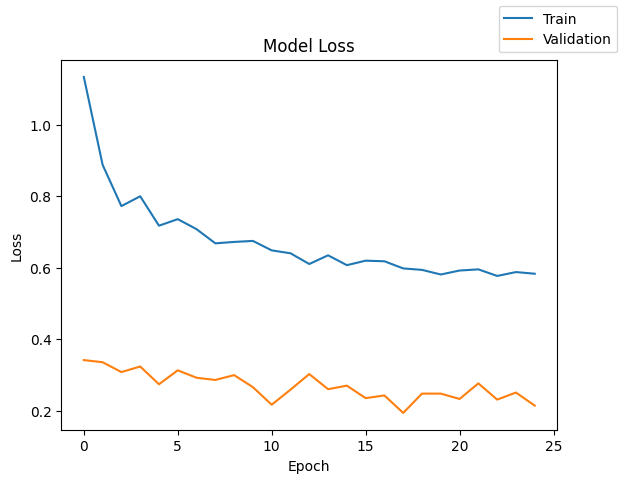

In [ ]:
plot(history,'loss')

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train, y_train)
model_3_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.957467  0.922614   0.784475  0.837235

In [ ]:
model_3_val_perf = model_performance_classification(model_3, X_val, y_val)
model_3_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0    0.9558  0.912277   0.779537  0.830485

In [ ]:
y_train_pred_3 = model_3.predict(X_train)
y_val_pred_3 = model_3.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print("Classification Report - Train data Model_3", end="\n\n")
cr_train_model_3 = classification_report(y_train, y_train_pred_3 > 0.5)
print(cr_train_model_3)

Classification Report - Train data Model_3

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98     14168
         1.0       0.58      0.88      0.70       832

    accuracy                           0.96     15000
   macro avg       0.78      0.92      0.84     15000
weighted avg       0.97      0.96      0.96     15000



In [ ]:
print("Classification Report - Validation data Model_3", end="\n\n")
cr_val_model_3 = classification_report(y_val, y_val_pred_3 > 0.5)
print(cr_val_model_3)

Classification Report - Validation data Model_3

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      4722
         1.0       0.57      0.86      0.68       278

    accuracy                           0.96      5000
   macro avg       0.78      0.91      0.83      5000
weighted avg       0.97      0.96      0.96      5000



Finally We observe that our model is performing better than other models in terms of Recall and subsequently in terms of Precision as well with class weights.

## Model 4

Since we have used only SGD optimizer till now, let's use another kind of optimizer and observe its impact on the model performmance.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model_4 = Sequential()
model_4.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_4.add(Dense(7,activation="relu"))
model_4.add(Dense(1,activation="sigmoid"))

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             574 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [ ]:
start = time.time()
history = model_4.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.3003 - loss: 0.1899 - val_Recall: 0.5576 - val_loss: 0.1077
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.5721 - loss: 0.0953 - val_Recall: 0.6906 - val_loss: 0.0878
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7189 - loss: 0.0725 - val_Recall: 0.7554 - val_loss: 0.0787
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7495 - loss: 0.0661 - val_Recall: 0.7734 - val_loss: 0.0684
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8070 - loss: 0.0560 - val_Recall: 0.8129 - val_loss: 0.0650
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7933 - loss: 0.0548 - val_Recall: 0.8022 - val_loss: 0.0610
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8253 - loss: 0.0541 - val_Recall: 0.8309 - val_loss: 0.0604
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.8486 - loss: 0.0446 - val_Recall: 0.8489 - val_loss: 0.0606
Epoch 9/

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  17.193333387374878


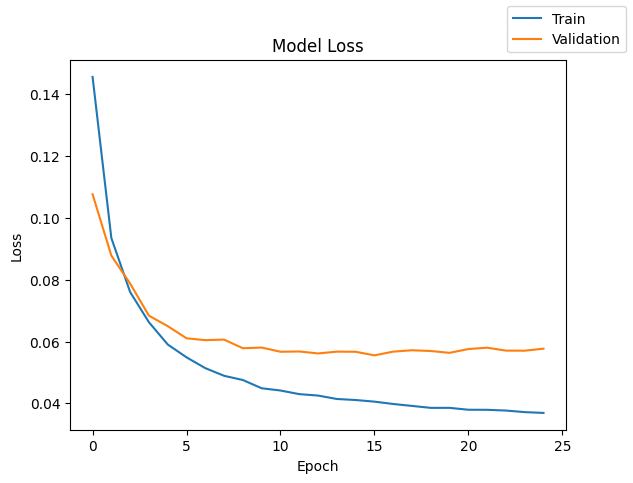

In [ ]:
plot(history,'loss')

In [ ]:
model_4_train_perf = model_performance_classification(model_4, X_train, y_train)
model_4_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.992733  0.938455   0.991675  0.963348

In [ ]:
model_4_val_perf = model_performance_classification(model_4, X_val, y_val)
model_4_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0    0.9908  0.930808   0.979873  0.953846

In [ ]:
y_train_pred_4 = model_4.predict(X_train)
y_val_pred_4 = model_4.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print("Classification Report - Train data Model_4", end="\n\n")
cr_train_model_4 = classification_report(y_train, y_train_pred_4 > 0.5)
print(cr_train_model_4)

Classification Report - Train data Model_4

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     14168
         1.0       0.99      0.88      0.93       832

    accuracy                           0.99     15000
   macro avg       0.99      0.94      0.96     15000
weighted avg       0.99      0.99      0.99     15000



In [ ]:
print("Classification Report - Validation data Model_4", end="\n\n")
cr_val_model_4 = classification_report(y_val, y_val_pred_4 > 0.5)
print(cr_val_model_4)

Classification Report - Validation data Model_4

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      4722
         1.0       0.97      0.86      0.91       278

    accuracy                           0.99      5000
   macro avg       0.98      0.93      0.95      5000
weighted avg       0.99      0.99      0.99      5000



We observe that the model's performance is very good when we use ADAM optimizer. Although the model does not show any signs of overfitting, let's introduce a dropout and observe its impact on the model performance.

## Model 5

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
from tensorflow.keras.layers import Dropout
model_5 = Sequential()
model_5.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_5.add(Dropout(0.5)) #Setting up dropout to 50%
model_5.add(Dense(7,activation="relu"))
model_5.add(Dense(3, activation = "relu"))
model_5.add(Dense(1,activation="sigmoid"))

In [ ]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             574 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 707 (2.76 KB)

 Trainable params: 707 (2.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining SGD as the optimizer to be used
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [ ]:
start = time.time()
history = model_5.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - Recall: 0.0164 - loss: 0.3640 - val_Recall: 0.0000e+00 - val_loss: 0.1388
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.0000e+00 - loss: 0.1736 - val_Recall: 0.0000e+00 - val_loss: 0.1246
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0000e+00 - loss: 0.1543 - val_Recall: 0.0000e+00 - val_loss: 0.1200
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0000e+00 - loss: 0.1384 - val_Recall: 0.0000e+00 - val_loss: 0.1143
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0000e+00 - loss: 0.1296 - val_Recall: 0.0000e+00 - val_loss: 0.1112
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0000e+00 - loss: 0.1194 - val_Recall: 0.0000e+00 - val_loss: 0.1078
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0000e+00 - loss: 0.1167 - val_Recall: 0.0000e+00 - val_loss: 0.1052
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.0329 - loss: 0.1

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  19.967504739761353


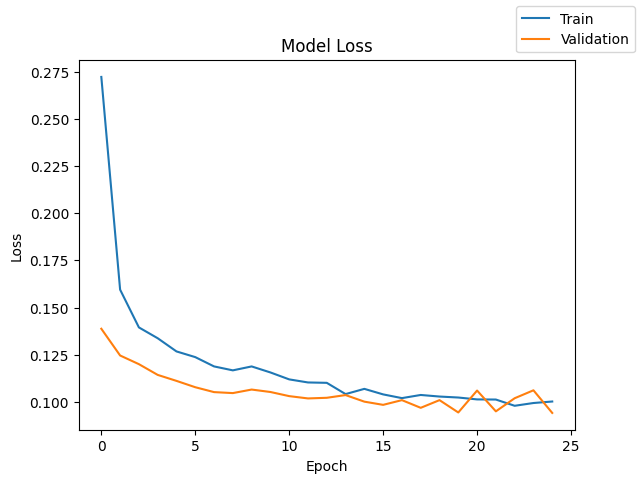

In [ ]:
plot(history,'loss')

In [ ]:
model_5_train_perf = model_performance_classification(model_5, X_train, y_train)
model_5_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.984533  0.874719   0.973557   0.91766

In [ ]:
model_5_val_perf = model_performance_classification(model_5, X_val, y_val)
model_5_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0    0.9848  0.876851   0.974541  0.919389

In [ ]:
y_train_pred_5 = model_5.predict(X_train)
y_val_pred_5 = model_5.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print("Classification Report - Train data Model_2", end="\n\n")
cr_train_model_5 = classification_report(y_train, y_train_pred_5 > 0.5)
print(cr_train_model_5)

Classification Report - Train data Model_2

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     14168
         1.0       0.96      0.75      0.84       832

    accuracy                           0.98     15000
   macro avg       0.97      0.87      0.92     15000
weighted avg       0.98      0.98      0.98     15000



In [ ]:
print("Classification Report - Validation data Model_2", end="\n\n")
cr_val_model_5 = classification_report(y_val, y_val_pred_5 > 0.5)
print(cr_val_model_5)

Classification Report - Validation data Model_2

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4722
         1.0       0.96      0.76      0.85       278

    accuracy                           0.98      5000
   macro avg       0.97      0.88      0.92      5000
weighted avg       0.98      0.98      0.98      5000



The model performance has dropped considerably by introducing dropout. This shows that the model generalizes well without any dropout value.

## Model 6

Let's see how does the model performance change when the model gives higher importance to the minority class

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
model_6 = Sequential()
model_6.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_6.add(Dropout(0.5)) #Setting up dropout to 50%
model_6.add(Dense(7,activation="relu"))
model_6.add(Dense(3, activation = "relu"))
model_6.add(Dense(1,activation="sigmoid"))

In [ ]:
model_6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 14)                  │             574 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 707 (2.76 KB)

 Trainable params: 707 (2.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [ ]:
start = time.time()
history = model_6.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict, )
end=time.time()

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.5067 - loss: 1.5770 - val_Recall: 0.8129 - val_loss: 0.4952
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7518 - loss: 1.2231 - val_Recall: 0.8669 - val_loss: 0.4363
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8169 - loss: 1.1527 - val_Recall: 0.8669 - val_loss: 0.3963
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8503 - loss: 1.0758 - val_Recall: 0.8921 - val_loss: 0.3842
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8649 - loss: 1.1026 - val_Recall: 0.8993 - val_loss: 0.4168
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8484 - loss: 1.0202 - val_Recall: 0.8813 - val_loss: 0.3527
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8747 - loss: 1.0187 - val_Recall: 0.8669 - val_loss: 0.3600
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8875 - loss: 0.8983 - val_Recall: 0.8849 - val_loss: 0.3885
Epoch 9/

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  19.841594219207764


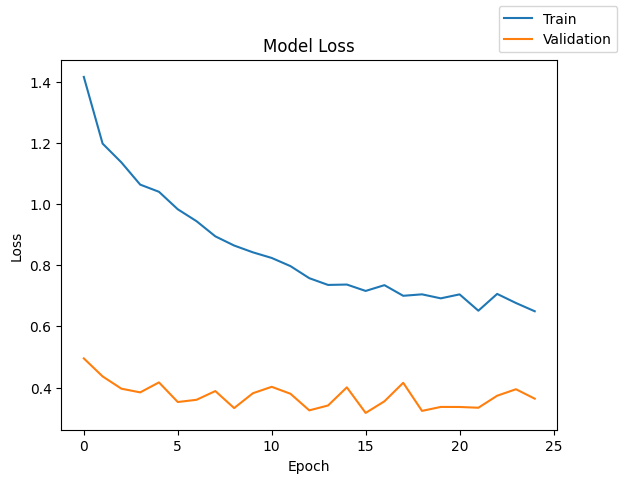

In [ ]:
plot(history,'loss')

In [ ]:
model_6_train_perf = model_performance_classification(model_6, X_train, y_train)
model_6_train_perf

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0    0.9398  0.926273   0.736057  0.796983

In [ ]:
model_6_val_perf = model_performance_classification(model_6, X_val, y_val)
model_6_val_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0    0.9382  0.914808   0.731774  0.790798

In [ ]:
y_train_pred_6 = model_6.predict(X_train)
y_val_pred_6 = model_6.predict(X_val)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print("Classification Report - Train data Model_6", end="\n\n")
cr_train_model_6 = classification_report(y_train, y_train_pred_6 > 0.5)
print(cr_train_model_6)

Classification Report - Train data Model_6

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97     14168
         1.0       0.48      0.91      0.63       832

    accuracy                           0.94     15000
   macro avg       0.74      0.93      0.80     15000
weighted avg       0.97      0.94      0.95     15000



In [ ]:
print("Classification Report - Validation data Model_6", end="\n\n")
cr_val_model_6 = classification_report(y_val, y_val_pred_6 > 0.5)
print(cr_val_model_6)

Classification Report - Validation data Model_6

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97      4722
         1.0       0.47      0.89      0.62       278

    accuracy                           0.94      5000
   macro avg       0.73      0.91      0.79      5000
weighted avg       0.96      0.94      0.95      5000



The performance of model_6 is very poor as it could not correctly classify even a single instance of the "failure" or "1" class.

# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and test sets.

**Training Performance Comparison**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6"
]
print("Training set performance comparison:")
models_train_comp_df

Training set performance comparison:


Model 0   Model 1   Model 2   Model 3   Model 4   Model 5  \
Accuracy   0.983267  0.987400  0.944533  0.957467  0.992733  0.984533   
Recall     0.864997  0.898863  0.500000  0.922614  0.938455  0.874719   
Precision  0.970259  0.978154  0.472267  0.784475  0.991675  0.973557   
F1 Score   0.910169  0.934470  0.485738  0.837235  0.963348  0.917660   

            Model 6  
Accuracy   0.939800  
Recall     0.926273  
Precision  0.736057  
F1 Score   0.796983

**Validation Performance Comparison**

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        model_0_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
        model_6_val_perf.T

    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Model 0",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6"
]
print("Validation set performance comparison:")
models_val_comp_df

Validation set performance comparison:


Model 0   Model 1   Model 2   Model 3   Model 4   Model 5  \
Accuracy   0.984000  0.986800  0.944400  0.955800  0.990800  0.984800   
Recall     0.871349  0.898222  0.500000  0.912277  0.930808  0.876851   
Precision  0.971746  0.972576  0.472200  0.779537  0.979873  0.974541   
F1 Score   0.914820  0.931817  0.485703  0.830485  0.953846  0.919389   

            Model 6  
Accuracy   0.938200  
Recall     0.914808  
Precision  0.731774  
F1 Score   0.790798

- We can observe that Model 4 (the neural network with 3 hidden layers, Adam optimizer, and no regularization or class weight adjustment) performs the best and achieves the highest recall.
- We'll choose this as our final model.

Let's check the performance of the final model on the test set.

In [ ]:
best_model = model_4

In [ ]:
# Test set performance for the best model
best_model_test_perf = model_performance_classification(best_model, X_test, y_test)
best_model_test_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0    0.9896  0.919471   0.980925  0.947826

In [ ]:
y_test_pred_best = best_model.predict(X_test)

cr_test_best_model = classification_report(y_test, y_test_pred_best > 0.5)
print(cr_test_best_model)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4718
         1.0       0.97      0.84      0.90       282

    accuracy                           0.99      5000
   macro avg       0.98      0.92      0.95      5000
weighted avg       0.99      0.99      0.99      5000



The model also performs quite well on the test data. The recall is greater than 0.8 for the "failure" class along with high precision and f1-score.

# **Actionable Insights and Recommendations**

## Confusion Matrix for the Best Model

Lets take a look into the confusion matrix to derive some insights.

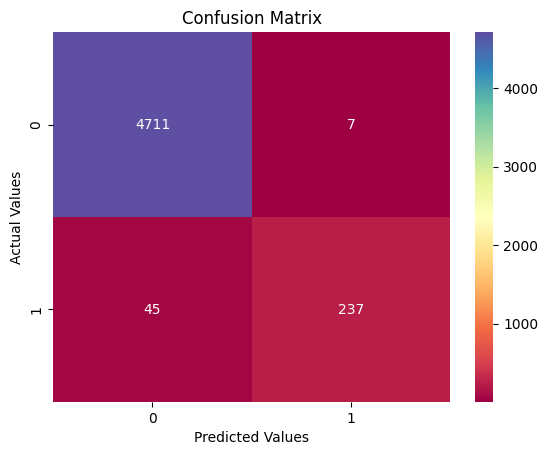

In [ ]:
cm = confusion_matrix(y_test , y_test_pred_best>0.5)
sns.heatmap(cm, annot=True, fmt='g', cmap= 'Spectral')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Now lets calculate the TP, FP, TN and FN to do further analysis.

In [ ]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print("True Negatives: ", TN)
print("False Positives: ", FP)
print("False Negatives: ", FN)
print("True Positives: ", TP)

True Negatives:  4711
False Positives:  7
False Negatives:  45
True Positives:  237


## Actionable Insights



1. **Removing Dropout layers**  
   - Using 50 % dropout layer in models, significantly reduces the performance. While This may be the result of dropping out too many neurons, it proves that the model generalizes better when not using dropout.

2. **Moderate Success in Detecting Failures (TP)**  
   - The model detects **237 true failures out of 282 total failures** (TP + FN), resulting in a recall of ~84.8% for failures. While this significantly reduces the replacement cost by enabling preemptive repairs, there is still room to improve failure detection.  

3. **Relatively Low False Positives (FP)**  
   - With only **7 false positives**, the inspection costs remain manageable. The model does not overburden maintenance teams with unnecessary inspections, aligning well with cost efficiency.  

4. **Model Performance**
   - The best model obtained is a neural network that achieves a recall of **92%** overall and **84%** on the "failure" class, along with high precision and F1-scores.

## Business Recommendations

1. **Focus on Reducing False Negatives (FN)**  
   - The **43 undetected failures (FN)** can lead to replacement costs, which are significantly higher than repair costs. To further minimize these, consider enhancing the model by incorporating additional predictive features in the original data or using ensemble techniques to improve recall for failures.  

2. **Implement Predictive Maintenance Protocols**  
   - Use the model's predictions to establish a **tiered maintenance protocol**:  
     - Prioritize generators predicted to fail (class 1) for immediate repair.  
     - Perform routine inspections on non-failure cases (class 0) to verify the model's predictions and refine future iterations.  

3. **Monitor Cost Trade-offs and Update Models Regularly**  
   - Continuously monitor the balance between inspection, repair, and replacement costs. Regularly update the model with new sensor data to adapt to changes in equipment performance and environmental conditions, ensuring sustained accuracy and cost savings.

<font size=6 color='blue'> Power Ahead! </font>
___